In [1]:
import cv2
import numpy as np
import os

In [2]:
color_list = [(255,0,0),
             (255,255,0),
             (255,0,255),
             (255,255,255),
             (0,0,255),
             (0,255,0),
             (128,0,0),
             (128,128,0),
             (128,0,128),
             (128,128,128),
             (0,0,128),
             (0,128,0),
             (64,0,0),
             (64,64,0),
             (64,0,64),
             (64,64,64),
             (0,0,64),
             (0,64,0),
             (32,0,0),
             (32,32,0),
             (32,0,32),
             (32,32,32),
             (0,0,32),
             (0,32,0)
             ]

In [3]:
classes = np.array([
                         'u-turn', 'keep-right', 'keep-left', 'pass-either-side',
                         'compulsory-motor-cycles-track', 'stop', 'no-left-turn', 'no-right-turn', 'no-u-turn',
                         'no-entry', 'weight-limit-sign-5T', 'weight-limit-sign-30T', 'height-limit-sign-2.-m',
                         'height-limit-sign-3.-m', 'height-limit-sign-4.-m', 'height-limit-sign-5.-m', 'height-limit-sign-6.-m',
                         'speed-limit-20', 'speed-limit-30', 'speed-limit-40', 'speed-limit-50', 'speed-limit-60', 'speed-limit-70',
                         'speed-limit-80', 'speed-limit-90','speed-limit-110', 'no-entry-for-vehicles-ex-5T-truntks-etc',
                         'heavy-vehicles-no-driving-on-right-lane', 'no-parking', 'no-stopping', 'give-way', 'wide-limit-3.-m',
                         'no-overtaking', 'road-work', 'camera-operation-zone', 'crosswind-area', 'caution-hump',
                         'hump-ahead', 'towing-zone', 'left-bend', 'slippery-road', 'pedestrain-crossing-opt1', 'pedestrain-crossing-opt2',
                         'school-childern-crossing-opt1', 'school-childern-crossing-opt2', 'caution', 'narrow-roads-on-the-left',
                         'traffic-lights-ahead', 'obstacles', 'staggered-junctions', 'crossroads-T-junction', 'crossroads-to-the-right',
                         'crossroads-to-the-left', 'exit-to-the-left', 'crossroads', 'minor-road-on-right', 'minor-road-on-left',
                         'minor-road-on-left-opt2', 'cattle-crossing', 'roundabout-ahead', 'narrow-bridge','split-way', 'two-way-road',
                         'divided-road-ending', 'curve-on-the-left', 'crossroads-Y-junction'])

In [99]:
classes[62]

'two-way-road'

In [8]:
np.where(classes == 'keep-right')[0][0]

1

## 1) Calculate the freq of each class and store all the freq < 50 in keep varaibale array

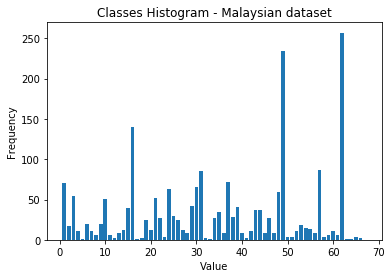

len 66
70
17
54
11
1
20
11
6
20
51
6
2
9
12
39
140
1
2
25
12
52
27
4
63
30
24
12
8
42
66
85
2
1
27
34
9
72
28
41
8
2
11
37
37
9
27
8
59
234
3
3
11
18
15
13
8
87
4
6
11
6
257
1
1
4
2
freq->
 [ 70  17  54  11   1  20  11   6  20  51   6   2   9  12  39 140   1   2
  25  12  52  27   4  63  30  24  12   8  42  66  85   2   1  27  34   9
  72  28  41   8   2  11  37  37   9  27   8  59 234   3   3  11  18  15
  13   8  87   4   6  11   6 257   1   1   4   2]
Mean: 30.58
 Var: 2138.15
 Max: 257.00
 Min: 1.00
 Sum: 2018.00
 STD: 46.24
 CV: 1.51

Total number of objects: 2018


In [297]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'data/MTSD/Annotations/gt_blur_filter.txt'


file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
# print counts
keep = np.where(frq < 50)
# print keep
# print classes[keep]
# print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
# print frq.mean(), frq.var(), frq.max(), frq.min(), frq.sum(), frq.std()
# print len(tmp)

print('len',len(counts))
for ck in counts:
    print(ck)

print('freq->\n',counts)
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print('Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean()) )
print('Total number of objects:',len(tmp))

# Calculating the blur factor NEW

blur factor =  828.4568642353341 0.18743367969125208


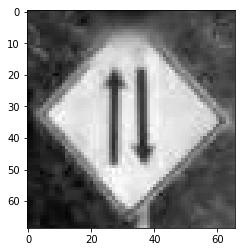

blur factor =  554.1703063796045 0.11318837957099766


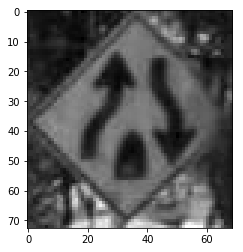

In [278]:
#P1860639.JPG
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

def variance_of_laplacian(image):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var()

im_path = './data/MTSD/Images/'
#im_path = './testing_images'

label_path = './data/test3/labels/'
#label_path = './testing_images'

fname = '56_2015.jpg'
#fname = '72.jpg' #'72.jpg' #'P1860639.JPG'

im = cv2.imread(os.path.join(im_path, fname))


gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
b,g,r = cv2.split(im)       # get b,g,r
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(200,100))
plt.imshow(rgb_img)
plt.show()
f = open(os.path.join(label_path, fname.split('.')[0]+'.txt'), 'r')
lines = f.readlines()
for line in lines:
    spl = line.split(' ')

    x1 = int(spl[1])#+1
    y1 = int(spl[2])#+1
    x2 = int(spl[3])#-1
    y2 = int(spl[4])#-1
    fm = 0
    fm = variance_of_laplacian(gray[y1:y2+1,x1:x2+1])
    print('blur factor = ',fm, (fm/float((y2-y1)*(x2-x1))))
    plt.imshow(rgb_img[y1:y2+1,x1:x2+1,0],cmap='gray')
    plt.show()
f.close()


In [14]:
## testing the DCT
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt


def variance_of_laplacian(image):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var()

im_path = './data/MTSD/Images/'
files = [f for f in os.listdir(im_path) if os.path.isfile(os.path.join(im_path,f))]
label_path = './data/test3/labels/'
gt_out_p = './data/MTSD/Annotations/gt_blur_filter2.txt'
gt_out_f = open(gt_out_p, 'w')

#fname = files[1002] #[1137] #[1002] #[1102]
#print(fname)

for fname in files:
    if fname.split('.')[1] == 'txt':
        continue
    if not os.path.exists(os.path.join(label_path, fname.split('.')[0]+'.txt')):
        continue
    im = cv2.imread(os.path.join(im_path, fname))
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    #print(im)
    
    f = open(os.path.join(label_path, fname.split('.')[0]+'.txt'), 'r')
        
    lines = f.readlines()
    for line in lines:
        spl = line.split(' ')

        x1 = int(spl[1])#+1
        y1 = int(spl[2])#+1
        x2 = int(spl[3])#-1
        y2 = int(spl[4])#-1
        fm = 0
        fm = variance_of_laplacian(gray[y1:y2+1,x1:x2+1])
        print('blur factor = ',fm, (fm/float((y2-y1)*(x2-x1))))
        #plt.imshow(gray[y1:y2+1,x1:x2+1])
        #plt.show()

        if fm < 4000:
            gt_out_f.write(fname +";"+ str(x1) + ";" +str(y1) + ";" + str(x2) + ";" + str(y2)+";"+str(np.where(classes == spl[0])[0][0])+'\n')

    f.close()
gt_out_f.close()

('blur factor = ', 111.50961100313546, 0.0015584851293240455)
('blur factor = ', 218.14059540791595, 0.03244208735989232)
('blur factor = ', 51.98667920624425, 0.00029401902115355256)
('blur factor = ', 68.72494093548337, 0.0004316893274841921)
('blur factor = ', 157.31856113009982, 0.07121709421914886)
('blur factor = ', 116.42279398605302, 0.007886654517413157)
('blur factor = ', 21.27032161168843, 0.00034172485077579254)
('blur factor = ', 41.29892977194014, 0.001507810506460027)
('blur factor = ', 464.0349409311049, 0.15918865898151113)
('blur factor = ', 340.26718650030875, 0.05891052397858531)
('blur factor = ', 267.82068732217823, 0.07199480841994038)
('blur factor = ', 25.43755463156359, 0.0006974543384394491)
('blur factor = ', 64.48380366927191, 0.0010965514347051645)
('blur factor = ', 57.805299476553984, 0.0009630203994427986)
('blur factor = ', 31.909164446936757, 0.000590516774871137)
('blur factor = ', 95.5918391125234, 0.0006910120222684146)
('blur factor = ', 58.543422

('blur factor = ', 19.93599591319546, 0.00010045853319826384)
('blur factor = ', 38.18413394769673, 0.013885139617344265)
('blur factor = ', 45.77166663932646, 0.0077212663021805775)
('blur factor = ', 20.927961977498434, 0.0003402920646747713)
('blur factor = ', 34.53911501637692, 0.004000824164992114)
('blur factor = ', 40.79498178899628, 0.004291498189458898)
('blur factor = ', 50.28188547808996, 0.009263427685720332)
('blur factor = ', 69.12746906656658, 0.021335638600792153)
('blur factor = ', 100.22570497918387, 0.015296963519411459)
('blur factor = ', 33.66753631476262, 0.001238779024018052)
('blur factor = ', 41.75057820350981, 0.0026379337968983263)
('blur factor = ', 47.21202124397968, 0.008394740619484295)
('blur factor = ', 44.38726871917783, 0.0017958920828280399)
('blur factor = ', 103.93663150152753, 0.0010087017808766258)
('blur factor = ', 159.05746578451243, 0.0052425005202542)
('blur factor = ', 120.18052438851235, 0.0034926046029791443)
('blur factor = ', 472.201394

('blur factor = ', 57.287562311927324, 0.0014762933207557614)
('blur factor = ', 101.86057052427842, 0.003264761875778154)
('blur factor = ', 30.805273033448557, 7.350795571533562e-05)
('blur factor = ', 114.89290387464848, 0.0014707609497766005)
('blur factor = ', 128.6801680810635, 0.017872245566814375)
('blur factor = ', 113.36590205900825, 0.020207825678967603)
('blur factor = ', 176.3244703513454, 0.01630218845704007)
('blur factor = ', 336.31906107122603, 0.019342020995584658)
('blur factor = ', 35.6784904518112, 0.00031429808886530066)
('blur factor = ', 6080.974930555556, 61.42398919753087)
('blur factor = ', 392.41751892089843, 0.06287734640616863)
('blur factor = ', 2798.5075347618235, 3.7017295433357456)
('blur factor = ', 6454.568499342538, 48.898246207140446)
('blur factor = ', 45.29172582366812, 0.0006236124610848175)
('blur factor = ', 74.22734547586994, 0.017407914042183382)
('blur factor = ', 110.00484659933915, 0.040682265754193474)
('blur factor = ', 317.565402735758

('blur factor = ', 193.87165235387133, 0.030675894359789766)
('blur factor = ', 565.3192515432098, 1.068656430138393)
('blur factor = ', 1929.4598000204062, 5.4046492997770486)
('blur factor = ', 116.50480908599242, 0.007340272749873514)
('blur factor = ', 101.20384859872686, 0.016659069728185493)
('blur factor = ', 852.920203402367, 0.34130460320222766)
('blur factor = ', 203.08880622364646, 0.006669583127213348)
('blur factor = ', 140.07797034799842, 0.003780373788200961)
('blur factor = ', 120.04437034468422, 0.0033640008503484442)
('blur factor = ', 18.614516603380242, 0.0007722584053841787)
('blur factor = ', 36.23610774619615, 0.007946514856621963)
('blur factor = ', 60.971477820518096, 0.0030026335969919283)
('blur factor = ', 72.73972671737148, 0.0279768179682198)
('blur factor = ', 1058.3620894867017, 0.07745624191208297)
('blur factor = ', 36.95621573621789, 0.0003254190616494333)
('blur factor = ', 44.12258095105135, 0.0005816470372413108)
('blur factor = ', 101.278485461790

('blur factor = ', 42.165750719723704, 0.0001748513415593638)
('blur factor = ', 13.531113771908132, 0.0004042396490278174)
('blur factor = ', 948.0590593197186, 2.1497937853054845)
('blur factor = ', 53.194479019985145, 0.00017555470159198814)
('blur factor = ', 72.97619088896974, 0.0013522874249785924)
('blur factor = ', 154.04598367473326, 0.1556020037118518)
('blur factor = ', 28.35481625766951, 0.0009641216000567667)
('blur factor = ', 42.80882921619375, 0.0007622654774963275)
('blur factor = ', 52.20576439227843, 0.0006122909631643084)
('blur factor = ', 131.94654259873724, 0.029919850929418877)
('blur factor = ', 39.32565586843237, 0.0005374560047619567)
('blur factor = ', 81.35387400119822, 0.004740625488094996)
('blur factor = ', 52.83362774655582, 0.001612748099711716)
('blur factor = ', 122.24837431241752, 0.004463248423235397)
('blur factor = ', 181.424017066545, 0.00658406884654491)
('blur factor = ', 39.812788911212664, 0.00019448004978268543)
('blur factor = ', 147.74753

('blur factor = ', 66.07661579188346, 0.004332324665085461)
('blur factor = ', 32.96981598096222, 0.0025907446158228995)
('blur factor = ', 146.09658554738257, 0.0043388152039493515)
('blur factor = ', 58.76078207911042, 0.0007159313572677813)
('blur factor = ', 41.44316770265824, 0.00046205061322561426)
('blur factor = ', 165.05467544367283, 0.03274244702314478)
('blur factor = ', 129.97784779932286, 0.02341943203591403)
('blur factor = ', 46.751710009907036, 0.014950978576881048)
('blur factor = ', 73.61188480228368, 0.0011410572420988915)
('blur factor = ', 37.52152425847694, 0.008375340236267173)
('blur factor = ', 1212.7391033975916, 3.3687197316599766)
('blur factor = ', 649.0407779085559, 0.28795065568258915)
('blur factor = ', 1302.66484375, 1.4490153990545052)
('blur factor = ', 28.735360477253536, 0.0004250855852490945)
('blur factor = ', 119.18252316868778, 0.006258600176899006)
('blur factor = ', 123.77294968707163, 0.005152054182778539)
('blur factor = ', 421.9253969280484

('blur factor = ', 18.446640184956973, 0.00037607829123255805)
('blur factor = ', 23.15696000576701, 0.0023159275933360346)
('blur factor = ', 25.03143353575156, 0.0024538215406089167)
('blur factor = ', 10.41727635215406, 0.004340531813397525)
('blur factor = ', 2666.357219013481, 1.1850476528948803)
('blur factor = ', 2727.7571132122025, 0.9020360824114426)
('blur factor = ', 3774.1489151293017, 1.2253730243926304)
('blur factor = ', 17.14027680592356, 0.00026637258622660824)
('blur factor = ', 47.777333314607425, 0.001496783625144343)
('blur factor = ', 63.78097155228936, 0.0018470106438170206)
('blur factor = ', 64.04970715802112, 0.002316445105172554)
('blur factor = ', 49.74357587796259, 0.0015352955517889688)
('blur factor = ', 50.15916985413866, 0.0005626694694502065)
('blur factor = ', 319.89794587710935, 0.023570435151570097)
('blur factor = ', 1508.2325138504157, 1.164658311853603)
('blur factor = ', 64.74072987728673, 0.002407166011425422)
('blur factor = ', 132.97586308070

('blur factor = ', 83.86640672083752, 0.0031767578303347546)
('blur factor = ', 132.80707373125722, 0.01328203557668339)
('blur factor = ', 1046.6039555266573, 0.3727222063841372)
('blur factor = ', 86.67308648789465, 0.0035615173606136853)
('blur factor = ', 108.60440657920984, 0.004580145351687324)
('blur factor = ', 191.43569577808262, 0.2538934957269)
('blur factor = ', 14.195089969061737, 0.00024425862460744624)
('blur factor = ', 109.52949121557423, 0.023815936337372088)
('blur factor = ', 83.47275890341528, 0.016571919575821974)
('blur factor = ', 65.5880319394003, 0.0621098787304927)
('blur factor = ', 84.50645486351402, 0.017051342789248188)
('blur factor = ', 370.5344847654332, 0.08637167477049724)
('blur factor = ', 35.96475420293143, 0.002893383282617171)
('blur factor = ', 35.86157756493013, 0.006049523880723706)
('blur factor = ', 57.89786700569456, 0.04873557828762168)
('blur factor = ', 66.26557582406468, 0.0458902879668038)
('blur factor = ', 46.60947545901056, 0.00365

('blur factor = ', 87.99531036922819, 0.004645513164883761)
('blur factor = ', 187.62497110848125, 0.03961675910229756)
('blur factor = ', 201.52738925505065, 0.04240896238532211)
('blur factor = ', 43.86478333473029, 0.0023829195640335883)
('blur factor = ', 179.00346786677989, 0.011737932319133107)
('blur factor = ', 349.5629925320257, 0.2022933984560334)
('blur factor = ', 386.74877257665736, 0.08615477223806134)
('blur factor = ', 248.03619155393073, 0.02293234019544478)
('blur factor = ', 84.68512957335666, 0.003129531765460335)
('blur factor = ', 177.85762721125607, 0.06099369931798905)
('blur factor = ', 22.3474291513305, 0.0004134125564475821)
('blur factor = ', 16.65480172357008, 0.0012594375169063885)
('blur factor = ', 302.49263601420137, 0.012838156184288319)
('blur factor = ', 61.48699388704811, 0.0008130941654705454)
('blur factor = ', 46.2961972423378, 0.00301113477998945)
('blur factor = ', 38.26458984381056, 0.0015623301422427961)
('blur factor = ', 978.0036608905972, 

('blur factor = ', 84.77338541516845, 0.0011588662704392011)
('blur factor = ', 93.80361654868835, 0.001248384569452866)
('blur factor = ', 94.83532696944982, 0.002120646846365157)
('blur factor = ', 253.16918707750293, 0.026207990380693883)
('blur factor = ', 179.94049874483778, 0.01798505734581087)
('blur factor = ', 54.4823870711481, 0.0001677227495448414)
('blur factor = ', 56.64598750147941, 0.0002090890509360006)
('blur factor = ', 131.36908065367405, 0.0021446612572839988)
('blur factor = ', 124.99297698675498, 0.002108518505174679)
('blur factor = ', 154.05706421787033, 0.016040927136387998)
('blur factor = ', 283.2547178788767, 0.0064643461107051145)
('blur factor = ', 317.1255516625611, 0.006958169906585947)
('blur factor = ', 401.81262806502286, 0.095103580607106)
('blur factor = ', 401.9836505735376, 0.11001194596976946)
('blur factor = ', 100.62311289353289, 0.07554287754769737)
('blur factor = ', 266.62846788194446, 0.19533221090252342)
('blur factor = ', 92.4255706504485

('blur factor = ', 148.52333406503175, 0.006339024074478521)
('blur factor = ', 249.70563213284336, 0.08892650716981601)
('blur factor = ', 409.1057422178567, 0.14564106166531032)
('blur factor = ', 403.596978799056, 0.015765506984338123)
('blur factor = ', 61.92674490593796, 0.0004969844300464505)
('blur factor = ', 13.711508625572112, 9.305022276372942e-05)
('blur factor = ', 30.35274128171776, 0.00016889657497394587)
('blur factor = ', 25.737826806465712, 0.00015463819661537087)
('blur factor = ', 34.99061800804363, 0.00867822867262987)
('blur factor = ', 79.24959831117894, 0.0009522902945347145)
('blur factor = ', 129.41065314035012, 0.01913226687468216)
('blur factor = ', 84.64665615251383, 0.006943942260255441)
('blur factor = ', 89.254017230906, 0.009107552778663878)
('blur factor = ', 22.234440565516145, 0.0004765612261127432)
('blur factor = ', 43.81883580618575, 0.001135438324165261)
('blur factor = ', 77.98700565241757, 0.003469635879005987)
('blur factor = ', 1131.183595749

('blur factor = ', 84.73441249037919, 0.00167389843129095)
('blur factor = ', 86.02469627223508, 0.0018438077904714308)
('blur factor = ', 88.09291176714768, 0.008817226680727423)
('blur factor = ', 36.05319659684946, 0.0014442653766313929)
('blur factor = ', 43.503115258839074, 0.0017101625622627202)
('blur factor = ', 33.27901611677807, 0.0004548302005901223)
('blur factor = ', 25.543374016496404, 0.0005306280696434502)
('blur factor = ', 46.00666549634264, 0.0007710183592482426)
('blur factor = ', 51.99413421546496, 0.0008189600273353226)
('blur factor = ', 58.810593639559144, 0.00027264489133052306)
('blur factor = ', 43.547804724686, 0.0006393089056283454)
('blur factor = ', 61.849516395800784, 0.003716918052632259)
('blur factor = ', 64.40112001800804, 0.025334822981120393)
('blur factor = ', 117.5683864554163, 0.06358484935392986)
('blur factor = ', 166.3589475410325, 0.13591417282764093)
('blur factor = ', 89.38759768666044, 0.002940961955868278)
('blur factor = ', 33.175474792

('blur factor = ', 17.380726147052346, 0.00013921063456774697)
('blur factor = ', 34.74406756233858, 0.0004823153362532425)
('blur factor = ', 1205.4430492154127, 0.12300439277708293)
('blur factor = ', 23.33691420046356, 0.00016204164896376538)
('blur factor = ', 20.509278020673314, 0.00014981320550678466)
('blur factor = ', 47.857069346063646, 0.005976157510747209)
('blur factor = ', 41.207964310896536, 0.005706683881857988)
('blur factor = ', 145.2447833539643, 0.005976167847019597)
('blur factor = ', 206.62511268083583, 0.07095642605797933)
('blur factor = ', 77.19290324062962, 0.006679898168971065)
('blur factor = ', 60.59626914509626, 0.06515727865064114)
('blur factor = ', 96.580475, 0.0419368106817195)
('blur factor = ', 142.9525859184382, 0.06618175274001768)
('blur factor = ', 18.15273947845784, 0.0001756331463916738)
('blur factor = ', 110.90960192856858, 0.0019098636507881351)
('blur factor = ', 78.89202504778443, 0.001386990595073566)
('blur factor = ', 164.193948962058, 0

('blur factor = ', 316.6149868721707, 0.2284379414662126)
('blur factor = ', 67.30578656635092, 0.01016396656091074)
('blur factor = ', 67.10146501088376, 0.002106135122752158)
('blur factor = ', 22.992438218021267, 0.0010791025586906306)
('blur factor = ', 37.11730835554558, 0.0010786779527912113)
('blur factor = ', 28.173276204246257, 0.0005983111664170544)
('blur factor = ', 73.86469823669648, 0.0028145365888087364)
('blur factor = ', 69.38155089149124, 0.0007976908056231604)
('blur factor = ', 1446.308476454294, 3.3479362880886434)
('blur factor = ', 23.514040906360968, 0.0002830902326739179)
('blur factor = ', 109.84161607685522, 0.01109511273503588)
('blur factor = ', 37.958068934932996, 0.011060043395959498)
('blur factor = ', 48.091705281362266, 0.0009487601902062039)
('blur factor = ', 47.61569027468991, 0.0007967286372178888)
('blur factor = ', 32.47431800847696, 0.001668772765081036)
('blur factor = ', 27.508023397199, 0.0013648237855221534)
('blur factor = ', 166.5722642651

('blur factor = ', 113.73743561945493, 0.015623274123551502)
('blur factor = ', 35.730150795317066, 0.0004121695136041559)
('blur factor = ', 61.4277603945224, 0.02378155648258707)
('blur factor = ', 103.20047520980779, 0.04047077459208149)
('blur factor = ', 41.53345435376068, 0.000625739425292063)
('blur factor = ', 107.23670096783673, 0.0026151465875197955)
('blur factor = ', 127.28620779047176, 0.03477765240176824)
('blur factor = ', 1052.6631116150165, 0.2148730580965537)
('blur factor = ', 189.77788597601767, 0.004032336519973178)
('blur factor = ', 118.2457235661935, 0.0020529127860933957)
('blur factor = ', 56.04563883505839, 0.021622545846858948)
('blur factor = ', 36.447813457291645, 0.0007396816531160151)
('blur factor = ', 33.02453928009251, 8.675303811957378e-05)
('blur factor = ', 89.60652638140971, 0.0010331902774353117)
('blur factor = ', 70.6637810633182, 0.0006494832818319687)
('blur factor = ', 40.70039422048256, 0.0006725670366104694)
('blur factor = ', 165.03986379

In [300]:
gt_in_p = './data/MTSD/Annotations/gt_blur_filter.txt'
gt_in_f = open(gt_in_p, 'r')

lines = gt_in_f.readlines()
dic = {}

for line in lines:
    spl = line.split(';')
    if dic.has_key(spl[0]):
        dic[spl[0]].append(line)
    else:
        dic[spl[0]] =[line]
        
print(len(dic))

print(dic.items()[0])
print(dic['56_2015.jpg'])

977
('P1840593.JPG', ['P1840593.JPG;846;1256;1034;1443;37\n', 'P1840593.JPG;399;1467;522;1596;36\n', 'P1840593.JPG;459;1622;516;1690;36\n'])
['56_2015.jpg;532;436;597;504;62\n', '56_2015.jpg;1462;464;1530;536;63\n']


In [44]:
print(dic.items()[0][1])

['P1840593.JPG;846;1256;1034;1443;37\n', 'P1840593.JPG;399;1467;522;1596;36\n', 'P1840593.JPG;459;1622;516;1690;36\n']


('P1860368.JPG', ['P1860368.JPG;3372;1646;3573;1864;48\n', 'P1860368.JPG;464;1545;745;1846;43\n'])
976 / 977


Button(description=u'Next', style=ButtonStyle())

Button(description=u'Back', style=ButtonStyle())

blur factor =  45.98536465887846 0.0010494628841772435
blur factor =  36.22664957300177 0.00042830717978034985


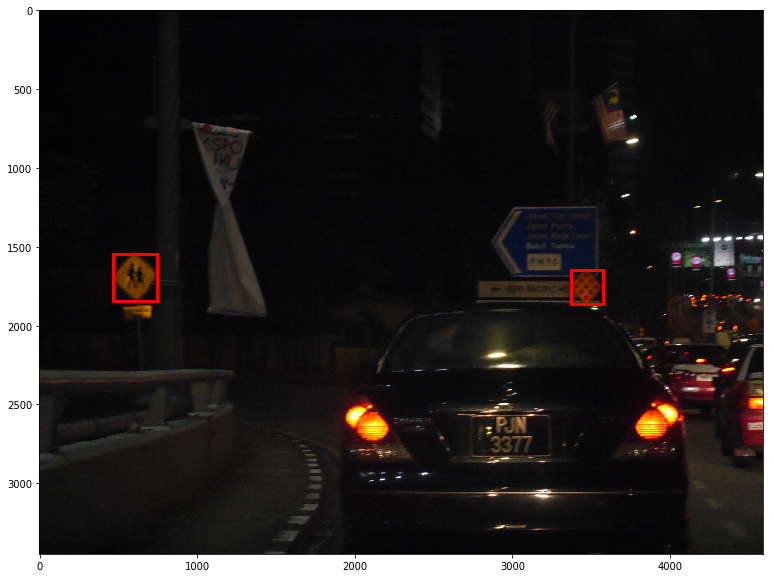

In [302]:
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
import matplotlib.image as mpimg

%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual#, Button
import ipywidgets as widgets
from IPython import display

import matplotlib.patches as patches


i=0
button_next = widgets.Button(description="Next")
button_back = widgets.Button(description="Back")

im_path = './data/MTSD/Images/'
gt_in_p = './data/MTSD/Annotations/gt_blur_filter.txt'
gt_in_f = open(gt_in_p, 'r')

lines = gt_in_f.readlines()
dic = {}

for line in lines:
    spl = line.split(';')
    if dic.has_key(spl[0]):
        dic[spl[0]].append(line)
    else:
        dic[spl[0]] = [line]

print(i+1,'/',len(dic))
display.display(button_next,button_back)
#display.display(button_no)
fig,ax = plt.subplots(1, figsize = (20,10))
#plt.figure(figsize=(200,100))
ax.imshow( Image.open( os.path.join(im_path,dic.items()[i][0]) ) )
for k in dic.items()[i][1]:
    sp = k.split(';')
    rect = patches.Rectangle((int(sp[1]),int(sp[2])),int(sp[3])-int(sp[1]),int(sp[4])-int(sp[2]),linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

plt.show()

def on_click_next(b):
    #print("yes")
    global i
    
    i=i+1
    found = False
    while (not found) and (i<len(dic)):
        for k in dic.items()[i][1]:
            if k.split(';')[5] == '62\n':
                found = True

        i = i+1
    i=i-1
    display.clear_output()
    print(dic.items()[i])
    if i>= len(dic):
        print("Finish")
        return
    
    print(i,'/',len(dic))
    display.display(button_next)
    display.display(button_back)
    fig,ax = plt.subplots(1, figsize = (20,10))
    ax.imshow( Image.open( os.path.join(im_path,dic.items()[i][0]) ) )
    im = cv2.imread(os.path.join(im_path, dic.items()[i][0]))
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    for k in dic.items()[i][1]:
        sp = k.split(';')
        x1 = int(sp[1])
        y1 = int(sp[2])
        x2 = int(sp[3])
        y2 = int(sp[4])
        rect = patches.Rectangle((int(sp[1]),int(sp[2])),int(sp[3])-int(sp[1]),int(sp[4])-int(sp[2]),linewidth=3,edgecolor='r',facecolor='none')
        fm = variance_of_laplacian(gray[y1:y2+1,x1:x2+1])
        print('blur factor = ',fm, (fm/float((y2-y1)*(x2-x1))))
        ax.add_patch(rect)
    plt.show()
    
def on_click_back(b):
    global i
    
    if i==0:
        return
              
    i=i-1
    
    display.clear_output()
    
    
    print(i+1,'/',len(dic))
    display.display(button_next)
    display.display(button_back)
    fig,ax = plt.subplots(1, figsize = (20,10))
    ax.imshow( Image.open( os.path.join(im_path,dic.items()[i][0]) ) )
    for k in dic.items()[i][1]:
        sp = k.split(';')
        rect = patches.Rectangle((int(sp[1]),int(sp[2])),int(sp[3])-int(sp[1]),int(sp[4])-int(sp[2]),linewidth=3,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
    plt.show()

    
button_next.on_click(on_click_next)
button_back.on_click(on_click_back)

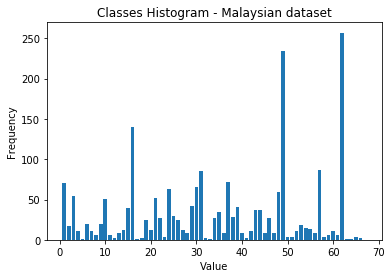

len 66
70
17
54
11
1
20
11
6
20
51
6
2
9
12
39
140
1
2
25
12
52
27
4
63
30
24
12
8
42
66
85
2
1
27
34
9
72
28
41
8
2
11
37
37
9
27
8
59
234
3
3
11
18
15
13
8
87
4
6
11
6
257
1
1
4
2
freq->
 [ 70  17  54  11   1  20  11   6  20  51   6   2   9  12  39 140   1   2
  25  12  52  27   4  63  30  24  12   8  42  66  85   2   1  27  34   9
  72  28  41   8   2  11  37  37   9  27   8  59 234   3   3  11  18  15
  13   8  87   4   6  11   6 257   1   1   4   2]
Mean: 30.58
 Var: 2138.15
 Max: 257.00
 Min: 1.00
 Sum: 2018.00
 STD: 46.24
 CV: 1.51

Total number of objects: 2018


In [303]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'data/MTSD/Annotations/gt_blur_filter.txt'


file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
# print counts
keep = np.where(frq < 50)
# print keep
# print classes[keep]
# print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
# print frq.mean(), frq.var(), frq.max(), frq.min(), frq.sum(), frq.std()
# print len(tmp)

print('len',len(counts))

for ck in counts:
    print(ck)

print('freq->\n',counts)
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print('Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean()) )
print('Total number of objects:',len(tmp))

## 2) Loop for each image
### - blur the objects that is not in keep array
### - store only the images that have at least one object in keep array in aug folder
### - store aswell the labels for each image obj in aug folder in aug_labels

In [222]:
im_path = './data/MTSD/Images/'
files = [f for f in os.listdir(im_path) if os.path.isfile(os.path.join(im_path,f))]
#mask_path = './data/test/gt/'
label_path = './data/test3/labels/'

#fname = 'P1840185.JPG'
#fname = 'P1840114.JPG'
#fname = 'P1840116.JPG'
#fname = 'P1860061.JPG'

#keep = [0,2,3,4,5,6,8,9,10,11]

for fname in files:
    if fname.split('.')[1] == 'txt':
        continue
    #print fname
    if not os.path.isfile(os.path.join(label_path, fname.split('.')[0]+'.txt')):
        #fault = open('faults.txt', 'a')
        #fault.write(fil+'\n')
        continue
    
    store = False

    im = cv2.imread(os.path.join(im_path, fname))
    org = im.copy()
    f = open(os.path.join(label_path, fname.split('.')[0]+'.txt'), 'r')
    
    lines = f.readlines()
    text = ''
    for line in lines:
        spl = line.split(' ')
        i = np.where(classes == spl[0])[0][0]
        if i not in keep[0]:
            x1 = int(spl[1])#+1
            y1 = int(spl[2])#+1
            x2 = int(spl[3])#-1
            y2 = int(spl[4])#-1

            #print y2-y1, x2-x1

            #cv2.imwrite('without_aug.jpg', im)
            #print im[y1:y2,x1:x2]

            np.random.shuffle(im[y1:y2+1,x1:x2+1,0])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,0].T)

            np.random.shuffle(im[y1:y2+1,x1:x2+1,1])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,1].T)

            np.random.shuffle(im[y1:y2+1,x1:x2+1,2])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,2].T)

            #np.random.shuffle(im[y1:y2,x1:x2])
            #np.random.shuffle(im[y1:y2,x1:x2].T)

            blur = cv2.blur(im, (50, 50))

            #print lines[0] , x1, x2, y1, y2

            #print im[y1:y2,x1:x2,0]
            #cv2.imwrite('aug.jpg', im)

            num =10
            im[y1-num:y2+num,x1-num:x2+num] = blur[y1-num:y2+num,x1-num:x2+num]
            #cv2.imwrite('aug_blur.jpg', im)

    for line in lines:
        spl = line.split(' ')
        i = np.where(classes == spl[0])[0][0]
        if i in keep[0]:
            store = True
            
            #spl = line.split(' ')
            x1 = int(spl[1])#+1
            y1 = int(spl[2])#+1
            x2 = int(spl[3])#-1
            y2 = int(spl[4])#-1
            text += line
            #im2 = cv2.imread(os.path.join(im_path, fname))
            ynum = int(y2-y1)/14
            xnum = int(x2-x1)/14
            im[y1-ynum:y2+ynum,x1-xnum:x2+xnum] = org[y1-ynum:y2+ynum,x1-xnum:x2+xnum]
    
    if store:
        cv2.imwrite(os.path.join('data/test3/aug/',fname.split('.')[0]+'_aug'+'.jpg'), im)
        f_out = open(os.path.join('./data/test3/aug_labels/', fname.split('.')[0]+'_aug'+'.txt'), 'w')
        f_out.write(text)
        f_out.close()

## 3) Generate the mask image for each aug image

In [304]:
im_path = './data/test3/aug/'
files = [f for f in os.listdir(im_path) if os.path.isfile(os.path.join(im_path,f))]

In [305]:
'56_2015_aug.jpg' in files

True

In [231]:
mask_path = './data/test3/aug_gt/'
label_path = './data/test3/aug_labels/'

for fil in files:
    if not os.path.isfile(os.path.join(label_path, fil.split('.')[0]+'.txt')):
        #fault = open('faults.txt', 'a')
        #fault.write(fil+'\n')
        continue
    im = cv2.imread(os.path.join(im_path, fil))
    f = open(os.path.join(label_path, fil.split('.')[0]+'.txt'))
    #print os.path.join(label_path, fil.split('.')[0]+'.txt')
    lines = f.readlines()
    im_out = np.zeros(im.shape, np.uint8)
    for i, line in enumerate(lines):
        spl = line.split(' ')
        x1 = int(spl[1])#+1
        y1 = int(spl[2])#+1
        x2 = int(spl[3])#-1
        y2 = int(spl[4])#-1
        #print fil, i, line
        cv2.rectangle(im_out, (x1,y1), (x2,y2),color_list[i], -1)
    #print '______'
    cv2.imwrite(os.path.join(mask_path, fil), im_out)

## 4) Augment the images with ground truth mask

In [232]:
import Augmentor

In [233]:
p = Augmentor.Pipeline("./data/test3/aug")
p.ground_truth("./data/test3/aug_gt")

Initialised with 523 image(s) found.
Output directory set to ./data/test3/aug/output.523 ground truth image(s) found.


In [234]:
p.rotate(probability=0.4, max_left_rotation=5, max_right_rotation=5)
p.zoom(probability=0.3, min_factor=1.05, max_factor=1.1)
p.random_distortion(probability=0.7, grid_width=2, grid_height=2, magnitude=5)
p.skew_tilt(probability=0.5, magnitude=0.2)
p.skew(probability=0.5, magnitude=0.2)

#p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
#p.zoom(probability=0.5, min_factor=1.1, max_factor=1.2)
#p.random_distortion(probability=0.7, grid_width=4, grid_height=4, magnitude=8)
#p.skew_tilt(probability=0.5, magnitude=0.3)
#p.skew(probability=0.5, magnitude=0.3)

In [235]:
#p.remove_operation(operation_index=0)

p.status()

Operations: 5
	0: RotateRange (max_right_rotation=5.0 max_left_rotation=-5.0 probability=0.4 )
	1: Zoom (min_factor=1.05 max_factor=1.1 probability=0.3 )
	2: Distort (randomise_magnitude=True magnitude=5 grid_height=2 probability=0.7 grid_width=2 )
	3: Skew (magnitude=0.2 skew_type=TILT probability=0.5 )
	4: Skew (magnitude=0.2 skew_type=RANDOM probability=0.5 )
Images: 523
Classes: 1
	Class index: 0 Class label: aug 
Dimensions: 21
	Width: 1918 Height: 983
	Width: 1917 Height: 977
	Width: 1919 Height: 981
	Width: 1920 Height: 981
	Width: 1917 Height: 979
	Width: 1920 Height: 985
	Width: 1919 Height: 979
	Width: 1920 Height: 979
	Width: 3920 Height: 2208
	Width: 1920 Height: 1080
	Width: 1917 Height: 981
	Width: 1919 Height: 977
	Width: 1920 Height: 977
	Width: 1915 Height: 981
	Width: 3840 Height: 2160
	Width: 1919 Height: 983
	Width: 1915 Height: 975
	Width: 1917 Height: 983
	Width: 4592 Height: 3448
	Width: 1917 Height: 975
	Width: 1920 Height: 983
Formats: 1
	 JPEG

You can remove 

In [236]:
#p.sample(395*10, multi_threaded=True)
p.sample(44*100, multi_threaded=True)

Processing <PIL.Image.Image image mode=RGB size=3920x2208 at 0x7F9ACDA32F50>: 100%|██████████| 4400/4400 [21:35<00:00,  3.40 Samples/s]                   


## 5) Create the annotation for the new augmented images

In [335]:
aug_path = './data/test3/aug/output/'
files = [f for f in os.listdir(aug_path) if os.path.isfile(os.path.join(aug_path,f))]

gts = []
augs = []

for fi in files:
    if 'original' in fi:
        augs.append(fi)
    else:
        gts.append(fi)

In [336]:
augs

['aug_original_39_aug.jpg_0c9cfb88-9da2-4e8a-95f4-456f7716a76d.jpg',
 'aug_original_P1860062_aug.jpg_4b478320-fb8e-411f-96c0-2c4eeaefecc0.jpg',
 'aug_original_P1840375_aug.jpg_512374fa-ac2f-4982-85a4-4bc19afeb151.jpg',
 'aug_original_P1840318_aug.jpg_a84eb7a2-1bc3-4ad3-ab2c-9752919129d7.jpg',
 'aug_original_135_aug.jpg_bd387659-f181-4893-b5e4-0df075baf52c.jpg',
 'aug_original_61_aug.jpg_fa4d418c-f6a6-447c-9291-5cd96e0f8d37.jpg',
 'aug_original_P1860653_aug.jpg_207e28b0-86dd-4cb1-827d-2b231b37b44b.jpg',
 'aug_original_P1840217_aug.jpg_38966872-5db6-4d98-9e0c-ba0561f0f6cd.jpg',
 'aug_original_29_aug.jpg_872698ce-d21d-4d75-9fc2-05feaf51b749.jpg',
 'aug_original_119_aug.jpg_a7e9070f-10ff-4c72-af51-c44d83deba0d.jpg',
 'aug_original_DSC-0130_aug.jpg_0d3b341f-2584-4973-bb0f-df4bdb0caa75.jpg',
 'aug_original_P1840089_aug.jpg_f1dfb99a-5455-4cb2-8055-7cf55487121b.jpg',
 'aug_original_P1840510_aug.jpg_1d17bee1-46d8-4d94-9384-699f53bcda2e.jpg',
 'aug_original_P1840285_aug.jpg_3997b6f4-a8fe-4302-9d

In [337]:
mask_path = './data/test3/aug_gt/'
label_path = './data/test3/aug_labels/'

print(gts[0].split('_')[6] in augs[0].split('_')[4])
print(gts[0])
print(augs[0])
x = 'aug_original_49_aug.jpg_45daa9b6-92a4-4fc2-893e-f08ac42f23d1.jpg'
y = x.replace('aug_original_', '_groundtruth_(1)_aug_')
print(y, os.path.isfile(os.path.join(aug_path, y)))
print(len(augs), len(gts))

print(label_path, mask_path)

False
_groundtruth_(1)_aug_P1840507_aug.jpg_e8d43073-b332-4203-81f0-c5e40760c67b.jpg
aug_original_39_aug.jpg_0c9cfb88-9da2-4e8a-95f4-456f7716a76d.jpg
_groundtruth_(1)_aug_49_aug.jpg_45daa9b6-92a4-4fc2-893e-f08ac42f23d1.jpg False
4400 4400
./data/test3/aug_labels/ ./data/test3/aug_gt/


In [338]:
# mask with different colors space per each object sequential

#./data/test/gt/P1840014.JPG
#./data/test/gt/P1840114.JPG
# P1860079.JPG

#ff = '130.jpg'
mask_gt_path = './data/test3/aug/output/'
label_path = './data/test3/aug_labels/'

f_out = open('results3/gt_phase_1.txt', 'w')
for aug in augs:
    aug_sp = aug.split('_')
    gt = aug.replace('aug_original_', '_groundtruth_(1)_aug_')
    
    ############## bug fix if org file name have '_' #############
    org_file =  aug_sp[2] #+'_'+aug_sp[3]
    i=3
    while('aug' not in aug_sp[i]):
        org_file = org_file + '_' + aug_sp[i]
        i=i+1
    org_file = org_file + '_' + aug_sp[i]
    ##############################################################
    
    if not os.path.exists(os.path.join(label_path, org_file.split('.')[0]+'.txt')):
        print(os.path.join(label_path, org_file.split('.')[0]+'.txt'))
        continue
        
    im = cv2.imread(os.path.join(mask_gt_path,gt))
    f = open(os.path.join(label_path, org_file.split('.')[0]+'.txt'), 'r')
    
    #im[im == 255] = 1
    #im[im == 0] = 255
    #im[im == 1] = 0
    lines = f.readlines()
    #print 'Number of objects', len(lines)
    for i in range(0, len(lines)):
        lower = np.array(color_list[i])-10
        upper = np.array(color_list[i])+10
        mask = cv2.inRange(im, lower, upper)
        im3 = cv2.bitwise_and(im, im, mask=mask)


        #print 'obj#', i
        im2 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

        #print np.max(im2), np.min(im2)

        #cv2.imwrite(org_file+str(i)+'_thr.jpg', im2)
        ret, thresh = cv2.threshold(im2, 0, np.max(im2)+1 ,cv2.THRESH_BINARY)
        _, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #print len(contours), org_file
        if len(contours) == 0:
            continue
        #for i in range(0, len(contours)):
            #if(i%2 == 0)

        # getting the maximum width contours
        x,y,w,h = cv2.boundingRect(contours[0])
        for cnt in contours:
            cx, cy, cw, ch = cv2.boundingRect(cnt)
            if cw*ch > w*h: # bug fix compare the area instead of the width only
                x,y,w,h = cx, cy, cw, ch
        #cnt = contours[i]
        # Fix problem of corner small bbox
        #print im.shape, x,y,w+x,h+y, aug
        #if x == 0 or y == 0 or ((x+w) == im.shape[1]) or ((y+h) == im.shape[0]):
            #nw = float(w)/im.shape[1]
            #nh = float(h)/im.shape[0]
            #ratio = float(max(nw,nh)) / min(nw,nh)
            #if ratio >= 2.5:
                #print('skip->',ratio,nw, nh, aug, x, y, w, h, 'cls',cls_num)
                #continue
        #cv2.rectangle(im, (x,y), (x+w, y+h), (0,240,180), 5)
        cls_num = np.where(classes == lines[i].split(' ')[0])[0][0]
        f_out.write('./output/'+aug+';'+str(x)+';'+str(y)+';'+str(x+w)+';'+str(y+h)+';'+ str(cls_num) +'\n')
        #print (x,y), (x+w, y+h)
        #cv2.imwrite(org_file+str(i)+'.jpg', im)

        #print '_______'
f_out.close()

## filter all corner bbox

In [397]:
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

mask_gt_path = './data/test3/aug/output/'
label_path = './data/test3/aug_labels/'
f_anno = open('results3/gt_phase_1.txt', 'r')
lines = f_anno.readlines()

outlayer = []
outlayer_index = []

for i, line in enumerate(lines):
        spl = line.split(';')
        fname = spl[0]
        x1 = int(spl[1])#+1
        y1 = int(spl[2])#+1
        x2 = int(spl[3])#-1
        y2 = int(spl[4])#-1
        
        f_fname = os.path.join('./data/test3/aug/',fname)
        img = Image.open(f_fname)
        #img=mpimg.imread(f_fname)
        #if (x1 == 0) or (x2 == img.shape[1]) or (y1 == 0) or (y2 == img.shape[0]):
        if (x1 == 0) or (x2 == img.width) or (y1 == 0) or (y2 == img.height):
            #print(img.height, img.width)
            #print(f_fname, x1,y1,x2,y2)
            outlayer.append( (f_fname, x1,y1,x2,y2) )
            outlayer_index.append(i)
f_anno.close()

In [340]:
print(len(outlayer))

231


In [341]:
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual#, Button
import ipywidgets as widgets
from IPython import display

import matplotlib.patches as patches

keeping = []
discarding = []

i=0
button_yes = widgets.Button(description="Keep")
button_no = widgets.Button(description="Discard")

print(i+1,'/',len(outlayer))
display.display(button_yes,button_no)
#display.display(button_no)
fig,ax = plt.subplots(1, figsize = (20,10))
ax.imshow(Image.open(outlayer[i][0]))
rect = patches.Rectangle((outlayer[i][1],outlayer[i][2]),outlayer[i][3]-outlayer[i][1],outlayer[i][4]-outlayer[i][2],linewidth=3,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

def on_click_yes(b):
    #print("yes")
    global i
    
    keeping.append(i)
    i=i+1
    
    display.clear_output()
    if i>= len(outlayer):
        print("Finish")
        return
    
    print(i+1,'/',len(outlayer))
    display.display(button_yes)
    display.display(button_no)
    fig,ax = plt.subplots(1, figsize = (20,10))
    ax.imshow(Image.open(outlayer[i][0]))
    rect = patches.Rectangle((outlayer[i][1],outlayer[i][2]),outlayer[i][3]-outlayer[i][1],outlayer[i][4]-outlayer[i][2],linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.show()
    
def on_click_no(b):
    global i
    
    discarding.append(i)
    i=i+1
    
    display.clear_output()
    if i>= len(outlayer):
        print("Finish")
        return
    
    
    print(i+1,'/',len(outlayer))
    display.display(button_yes)
    display.display(button_no)
    fig,ax = plt.subplots(1, figsize = (20,10))
    ax.imshow(Image.open(outlayer[i][0]))
    rect = patches.Rectangle((outlayer[i][1],outlayer[i][2]),outlayer[i][3]-outlayer[i][1],outlayer[i][4]-outlayer[i][2],linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.show()

    
button_yes.on_click(on_click_yes)
button_no.on_click(on_click_no)

Finish


# for testing

In [381]:
print(i)
print(i-2)
print(outlayer[i-2])

208
206
('./data/test3/aug/./output/aug_original_P1840200_aug.jpg_23e69535-0b92-416f-9200-ef144539e41c.jpg', 0, 1582, 260, 1926)


In [448]:
# mask with different colors space per each object sequential

#./data/test/gt/P1840014.JPG
#./data/test/gt/P1840114.JPG
# P1860079.JPG

#ff = '130.jpg'
mask_gt_path = './data/test3/aug/output/'
label_path = './data/test3/aug_labels/'

aug = 'aug_original_P1840123_aug.jpg_3e6e0608-f4dc-4b0d-b64f-e8f5d650fb97.jpg'
#aug = 'aug_original_P1840009_aug.jpg_f4d4a728-4067-4df1-8352-34689f61fc71.jpg'
#aug = 'aug_original_P1840602_aug.jpg_6184fcf3-90b8-4ec0-9139-28d16f978d96.jpg'
aug_sp = aug.split('_')
gt = aug.replace('aug_original_', '_groundtruth_(1)_aug_')

############## bug fix if org file name have '_' #############
org_file =  aug_sp[2] #+'_'+aug_sp[3]
ii=3
while('aug' not in aug_sp[ii]):
    org_file = org_file + '_' + aug_sp[ii]
    ii=ii+1
org_file = org_file + '_' + aug_sp[ii]
##############################################################

if not os.path.exists(os.path.join(label_path, org_file.split('.')[0]+'.txt')):
    print(os.path.join(label_path, org_file.split('.')[0]+'.txt'))

im = cv2.imread(os.path.join(mask_gt_path,gt))
f = open(os.path.join(label_path, org_file.split('.')[0]+'.txt'), 'r')

#im[im == 255] = 1
#im[im == 0] = 255
#im[im == 1] = 0
lines = [f.readlines()[0]]
#lines = f.readlines()
print(lines)
#print 'Number of objects', len(lines)
for ii in range(0, len(lines)):
    lower = np.array(color_list[ii])-10
    upper = np.array(color_list[ii])+10
    mask = cv2.inRange(im, lower, upper)
    im3 = cv2.bitwise_and(im, im, mask=mask)


    #print 'obj#', i
    im2 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

    #print np.max(im2), np.min(im2)

    #cv2.imwrite(org_file+str(i)+'_thr.jpg', im2)
    ret, thresh = cv2.threshold(im2, 0, np.max(im2)+1 ,cv2.THRESH_BINARY)
    _, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #print len(contours), org_file
    if len(contours) == 0:
        print('no contours')
        
    #for i in range(0, len(contours)):
        #if(i%2 == 0)

    # getting the maximum width contours
    x,y,w,h = cv2.boundingRect(contours[0])
    for cnt in contours:
        cx, cy, cw, ch = cv2.boundingRect(cnt)
        if cw*ch > w*h:
            x,y,w,h = cx, cy, cw, ch
    #cnt = contours[i]
    # Fix problem of corner small bbox
    #print im.shape, x,y,w+x,h+y, aug
    #if x == 0 or y == 0 or ((x+w) == im.shape[1]) or ((y+h) == im.shape[0]):
        #nw = float(w)/im.shape[1]
        #nh = float(h)/im.shape[0]
        #ratio = float(max(nw,nh)) / min(nw,nh)
        #if ratio >= 2.5:
            #print('skip->',ratio,nw, nh, aug, x, y, w, h, 'cls',cls_num)
            #continue
    #cv2.rectangle(im, (x,y), (x+w, y+h), (0,240,180), 5)
    cls_num = np.where(classes == lines[ii].split(' ')[0])[0][0]
    print('./output/'+aug+';'+str(x)+';'+str(y)+';'+str(x+w)+';'+str(y+h)+';'+ str(cls_num) +'\n')
    #print (x,y), (x+w, y+h)
    #cv2.imwrite(org_file+str(i)+'.jpg', im)

    #print '_______'

['crossroads 319 1658 570 1873\n']
./output/aug_original_P1840123_aug.jpg_3e6e0608-f4dc-4b0d-b64f-e8f5d650fb97.jpg;0;1820;252;2042;54



In [452]:
print(len(contours))
print('X1\t','Y1\t','W\t','H')
x,y,w,h = cv2.boundingRect(contours[0])
for cnt in contours:
    cx,cy,cw,ch = cv2.boundingRect(cnt)
    if cw*ch > w*h:
        x,y,w,h = cx, cy, cw, ch
    print(cx,'\t',cy,'\t',cw,'\t',ch)
print('max is ',x,y,w,h)

11
X1	 Y1	 W	 H
0 	 2044 	 253 	 1
0 	 1820 	 252 	 222
243 	 2015 	 5 	 8
241 	 1984 	 4 	 17
231 	 1912 	 5 	 9
225 	 1888 	 6 	 24
229 	 1879 	 4 	 10
225 	 1871 	 4 	 7
225 	 1845 	 4 	 12
223 	 1835 	 4 	 5
0 	 1817 	 227 	 3
max is  0 1820 252 222


## for testing end

In [399]:
print('keeping:',len(keeping),'/',len(outlayer),'\ndiscarding:', len(discarding),'/', len(outlayer))

keeping: 124 / 231 
discarding: 107 / 231


In [400]:
noutlayer = np.array(outlayer)
noutlayer_index = np.array(outlayer_index)
new_lines = []
mapping_lines = {}
for ii,jj in enumerate(noutlayer_index):
    mapping_lines[jj] = ii
    #print(ii, jj, lines[jj])
for ii, line in enumerate(lines):
    if mapping_lines.has_key(ii):
        if mapping_lines[ii] in discarding:
            continue
    new_lines.append(line)
#print(keeping)
#print(noutlayer[keeping])

In [401]:
print(len(new_lines), len(lines))

6102 6209


In [402]:
!cp ./results3/gt_phase_1.txt ./results3/gt_phase_1.txt.backup

In [403]:
f_out = open('results3/gt_phase_1.txt', 'w')
f_out.writelines(new_lines)
f_out.close()

In [404]:
print(discarding)
print(noutlayer[discarding])

[0, 4, 5, 7, 8, 9, 11, 13, 15, 19, 21, 26, 27, 28, 32, 34, 36, 38, 39, 42, 43, 44, 45, 47, 48, 51, 52, 55, 58, 59, 60, 62, 63, 65, 68, 69, 72, 73, 75, 78, 79, 80, 82, 83, 84, 85, 86, 90, 92, 95, 96, 98, 102, 105, 106, 108, 109, 110, 111, 118, 120, 121, 122, 125, 127, 128, 129, 130, 133, 134, 136, 137, 142, 143, 146, 152, 154, 155, 156, 157, 159, 163, 165, 167, 168, 177, 181, 182, 183, 188, 191, 192, 200, 203, 204, 206, 208, 209, 210, 212, 213, 214, 218, 220, 221, 224, 230]
[['./data/test3/aug/./output/aug_original_P1840140_aug.jpg_d33b015e-faf1-4be5-a2e5-a6490b1b9805.jpg'
  '0' '1502' '21' '1843']
 ['./data/test3/aug/./output/aug_original_P1840038_aug.jpg_1217ba39-d34e-426b-8695-edcd846e16be.jpg'
  '0' '644' '170' '864']
 ['./data/test3/aug/./output/aug_original_P1840018_aug.jpg_10274ac5-a6e3-400c-9408-8b854083758c.jpg'
  '0' '1485' '97' '1747']
 ['./data/test3/aug/./output/aug_original_P1840140_aug.jpg_c416e9bf-a613-4a8c-9671-d50e0c00b2d7.jpg'
  '0' '1341' '114' '1787']
 ['./data/test

## End Phase 1

## Check histogram

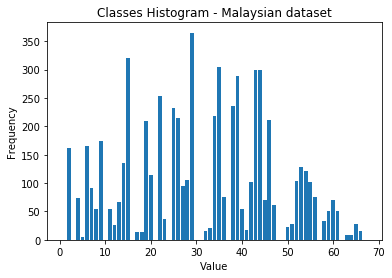

freq->
 [161  74   5 166  92  55 174  55  26  66 135 320  14  13 209 114 254  37
 233 214  94 105 365  16  21 218 304  75 236 289  55  17 102 299 299  70
 211  62  22  28 104 129 122 102  75  33  50  71  51   8   8  28  16]
Mean: 115.13
 Var: 9552.61
 Max: 365.00
 Min: 5.00
 Sum: 6102.00
 STD: 97.74
 CV: 0.85

Total number of objects: 6102


In [405]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'results3/gt_phase_1.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print ('freq->\n',counts)
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print ('Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean()) )
print ('Total number of objects:',len(tmp))

In [406]:
!cat gt_blur_filter.txt > ./results3/gt_phase_1_after_aug.txt
!cat ./results3/gt_phase_1.txt >> ./results3/gt_phase_1_after_aug.txt

## Phase 2

## 1) Calculate the freq of each class and store all the freq < 50 in keep varaibale array

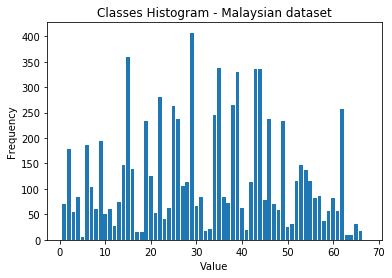

freq->
 [ 70 178  54  85   6 186 103  61 194  51  61  28  75 147 359 140  15  15
 234 126  52 281  41  63 263 238 106 113 407  66  85  18  22 245 338  84
  72 264 330  63  19 113 336 336  79 238  70  59 234  25  31 115 147 137
 115  83  87  37  56  82  57 257   9   9  32  18]
Mean: 123.03
 Var: 10641.18
 Max: 407.00
 Min: 6.00
 Sum: 8120.00
 STD: 103.16
 CV: 0.84

Total number of objects: 8120


In [407]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'results3/gt_phase_1_after_aug.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print ('freq->\n',counts)
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print ('Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean()) )
print ('Total number of objects:',len(tmp) )

In [408]:
keep = np.where(frq < 50)
print(keep)

(array([ 4, 11, 16, 17, 22, 31, 32, 40, 49, 50, 57, 62, 63, 64, 65]),)


## 2) Loop for each image
### - blur the objects that is not in keep array
### - store only the images that have at least one object in keep array in aug folder
### - store aswell the labels for each image obj in aug folder in aug_labels

In [409]:
im_path = './data/MTSD/Images/'
files = [f for f in os.listdir(im_path) if os.path.isfile(os.path.join(im_path,f))]
#mask_path = './data/test/gt/'
label_path = './data/test3/labels/'

#fname = 'P1840185.JPG'
#fname = 'P1840114.JPG'
#fname = 'P1840116.JPG'
#fname = 'P1860061.JPG'

#keep = [0,2,3,4,5,6,8,9,10,11]
for fname in files:
    if fname.split('.')[1] == 'txt':
        continue
        
    if not os.path.isfile(os.path.join(label_path, fname.split('.')[0]+'.txt')):
        #fault = open('faults.txt', 'a')
        #fault.write(fil+'\n')
        continue
    
    store = False

    im = cv2.imread(os.path.join(im_path, fname))
    org = im.copy()
    f = open(os.path.join(label_path, fname.split('.')[0]+'.txt'), 'r')
    
    lines = f.readlines()
    text = ''
    for line in lines:
        spl = line.split(' ')
        i = np.where(classes == spl[0])[0][0]
        if i not in keep[0]:
            x1 = int(spl[1])#+1
            y1 = int(spl[2])#+1
            x2 = int(spl[3])#-1
            y2 = int(spl[4])#-1

            #print y2-y1, x2-x1

            #cv2.imwrite('without_aug.jpg', im)
            #print im[y1:y2,x1:x2]

            np.random.shuffle(im[y1:y2+1,x1:x2+1,0])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,0].T)

            np.random.shuffle(im[y1:y2+1,x1:x2+1,1])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,1].T)

            np.random.shuffle(im[y1:y2+1,x1:x2+1,2])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,2].T)

            #np.random.shuffle(im[y1:y2,x1:x2])
            #np.random.shuffle(im[y1:y2,x1:x2].T)

            blur = cv2.blur(im, (50, 50))

            #print lines[0] , x1, x2, y1, y2

            #print im[y1:y2,x1:x2,0]
            #cv2.imwrite('aug.jpg', im)

            num =10
            im[y1-num:y2+num,x1-num:x2+num] = blur[y1-num:y2+num,x1-num:x2+num]
            #cv2.imwrite('aug_blur.jpg', im)

    for line in lines:
        spl = line.split(' ')
        i = np.where(classes == spl[0])[0][0]
        if i in keep[0]:
            store = True
            
            #spl = line.split(' ')
            x1 = int(spl[1])#+1
            y1 = int(spl[2])#+1
            x2 = int(spl[3])#-1
            y2 = int(spl[4])#-1
            text += line
            #im2 = cv2.imread(os.path.join(im_path, fname))
            ynum = int(y2-y1)/14
            xnum = int(x2-x1)/14
            im[y1-ynum:y2+ynum,x1-xnum:x2+xnum] = org[y1-ynum:y2+ynum,x1-xnum:x2+xnum]
    
    if store:
        cv2.imwrite(os.path.join('data/test3/aug2/',fname.split('.')[0]+'_aug'+'.jpg'), im)
        f_out = open(os.path.join('./data/test3/aug2_labels/', fname.split('.')[0]+'_aug'+'.txt'), 'w')
        f_out.write(text)
        f_out.close()

## 3) Generate the mask image for each aug image

In [410]:
im_path = './data/test3/aug2/'
files = [f for f in os.listdir(im_path) if os.path.isfile(os.path.join(im_path,f))]

In [411]:
mask_path = './data/test3/aug2_gt/'
label_path = './data/test3/aug2_labels/'

for fil in files:
    if not os.path.isfile(os.path.join(label_path, fil.split('.')[0]+'.txt')):
        #fault = open('faults.txt', 'a')
        #fault.write(fil+'\n')
        continue
    im = cv2.imread(os.path.join(im_path, fil))
    f = open(os.path.join(label_path, fil.split('.')[0]+'.txt'))
    #print os.path.join(label_path, fil.split('.')[0]+'.txt')
    lines = f.readlines()
    im_out = np.zeros(im.shape, np.uint8)
    for i, line in enumerate(lines):
        spl = line.split(' ')
        x1 = int(spl[1])#+1
        y1 = int(spl[2])#+1
        x2 = int(spl[3])#-1
        y2 = int(spl[4])#-1
        #print fil, i, line
        cv2.rectangle(im_out, (x1,y1), (x2,y2),color_list[i], -1)
    #print '______'
    cv2.imwrite(os.path.join(mask_path, fil), im_out)

## 4) Augment the images with ground truth mask

In [412]:
import Augmentor

p = Augmentor.Pipeline("./data/test3/aug2")
p.ground_truth("./data/test3/aug2_gt")

#p.rotate(probability=0.4, max_left_rotation=5, max_right_rotation=5)
#p.zoom(probability=0.3, min_factor=1.05, max_factor=1.1)
#p.random_distortion(probability=0.7, grid_width=2, grid_height=2, magnitude=5)
#p.skew_tilt(probability=0.5, magnitude=0.2)
#p.skew(probability=0.5, magnitude=0.2)

p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.5, min_factor=1.1, max_factor=1.2)
p.random_distortion(probability=0.7, grid_width=4, grid_height=4, magnitude=8)
p.skew_tilt(probability=0.5, magnitude=0.3)
p.skew(probability=0.5, magnitude=0.3)

#p.sample(44*100, multi_threaded=True)
p.sample(395*10, multi_threaded=True)

Executing Pipeline:   0%|          | 0/3950 [00:00<?, ? Samples/s]

Initialised with 33 image(s) found.
Output directory set to ./data/test3/aug2/output.33 ground truth image(s) found.


Processing <PIL.Image.Image image mode=RGB size=4592x3448 at 0x7F9AAC676490>: 100%|██████████| 3950/3950 [23:32<00:00,  2.80 Samples/s]                    


In [413]:
aug_path = './data/test3/aug2/output/'
files = [f for f in os.listdir(aug_path) if os.path.isfile(os.path.join(aug_path,f))]

gts = []
augs = []

for fi in files:
    if 'original' in fi:
        augs.append(fi)
    else:
        gts.append(fi)

In [414]:
print (gts[0].split('_')[6] in augs[0].split('_')[4])
print (gts[0])
print (augs[0])
x = 'aug_original_49_aug.jpg_45daa9b6-92a4-4fc2-893e-f08ac42f23d1.jpg'
y = x.replace('aug_original_', '_groundtruth_(1)_aug_')
print (y, os.path.isfile(os.path.join(aug_path, y)))
print (len(augs), len(gts))

print (label_path, mask_path)

False
_groundtruth_(1)_aug2_56_2015_aug.jpg_4ae5a185-c51c-412b-911e-849ccfc5dac3.jpg
aug2_original_P1840069_aug.jpg_7d576e61-9eac-4651-bd18-f4fdfd9091ad.jpg
_groundtruth_(1)_aug_49_aug.jpg_45daa9b6-92a4-4fc2-893e-f08ac42f23d1.jpg False
3950 3950
./data/test3/aug2_labels/ ./data/test3/aug2_gt/


## 5) Create the annotation for the new augmented images

In [415]:
# mask with different colors space per each object sequential

#./data/test/gt/P1840014.JPG
#./data/test/gt/P1840114.JPG
# P1860079.JPG

#ff = '130.jpg'
mask_gt_path = './data/test3/aug2/output/'
label_path = './data/test3/aug2_labels/'

f_out = open('results3/gt_phase_2.txt', 'w')
for aug in augs:
    aug_sp = aug.split('_')
    gt = aug.replace('aug2_original_', '_groundtruth_(1)_aug2_')
    ############## bug fix if org file name have '_' #############
    org_file =  aug_sp[2] #+'_'+aug_sp[3]
    i=3
    while('aug' not in aug_sp[i]):
        org_file = org_file + '_' + aug_sp[i]
        i=i+1
    org_file = org_file + '_' + aug_sp[i]
    ##############################################################
    
    
    if not os.path.exists(os.path.join(label_path, org_file.split('.')[0]+'.txt')):
        continue
        
    im = cv2.imread(os.path.join(mask_gt_path,gt))
    f = open(os.path.join(label_path, org_file.split('.')[0]+'.txt'), 'r')
    
    #im[im == 255] = 1
    #im[im == 0] = 255
    #im[im == 1] = 0
    lines = f.readlines()
    #print 'Number of objects', len(lines)
    for i in range(0, len(lines)):
        lower = np.array(color_list[i])-10
        upper = np.array(color_list[i])+10
        mask = cv2.inRange(im, lower, upper)
        im3 = cv2.bitwise_and(im, im, mask=mask)


        #print 'obj#', i
        im2 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

        #print np.max(im2), np.min(im2)

        #cv2.imwrite(org_file+str(i)+'_thr.jpg', im2)
        ret, thresh = cv2.threshold(im2, 0, np.max(im2)+1 ,cv2.THRESH_BINARY)
        _, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #print len(contours), org_file
        if len(contours) == 0:
            continue
        #for i in range(0, len(contours)):
            #if(i%2 == 0)

        # getting the maximum width contours
        x,y,w,h = cv2.boundingRect(contours[0])
        for cnt in contours:
            cx, cy, cw, ch = cv2.boundingRect(cnt)
            if cw*ch > w*h: # bug fix compare the area instead of the width only
                x,y,w,h = cx, cy, cw, ch
        #cnt = contours[i]
        #if x == 0 or y == 0 or ((x+w) == im.shape[1]) or ((y+h) == im.shape[0]):
            #nw = float(w)/im.shape[1]
            #nh = float(h)/im.shape[0]
            #ratio = float(max(nw,nh)) / min(nw,nh)
            #if ratio >= 2.5:
                #print('skip->', ratio,nw, nh, aug, x, y, w, h, 'cls',cls_num)
                #continue
        #cv2.rectangle(im, (x,y), (x+w, y+h), (0,240,180), 5)
        cls_num = np.where(classes == lines[i].split(' ')[0])[0][0]
        f_out.write('./output/'+aug+';'+str(x)+';'+str(y)+';'+str(x+w)+';'+str(y+h)+';'+ str(cls_num) +'\n')
        #print (x,y), (x+w, y+h)
        #cv2.imwrite(org_file+str(i)+'.jpg', im)

        #print '_______'
f_out.close()

## filter all corner bbox

In [416]:
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

mask_gt_path = './data/test3/aug2/output/'
label_path = './data/test3/aug2_labels/'
f_anno = open('results3/gt_phase_2.txt', 'r')
lines = f_anno.readlines()

outlayer = []
outlayer_index = []

for i, line in enumerate(lines):
        spl = line.split(';')
        fname = spl[0]
        x1 = int(spl[1])#+1
        y1 = int(spl[2])#+1
        x2 = int(spl[3])#-1
        y2 = int(spl[4])#-1
        
        f_fname = os.path.join('./data/test3/aug2/',fname)
        img = Image.open(f_fname)
        #img=mpimg.imread(f_fname)
        #if (x1 == 0) or (x2 == img.shape[1]) or (y1 == 0) or (y2 == img.shape[0]):
        if (x1 == 0) or (x2 == img.width) or (y1 == 0) or (y2 == img.height):
            #print(img.height, img.width)
            #print(f_fname, x1,y1,x2,y2)
            outlayer.append( (f_fname, x1,y1,x2,y2) )
            outlayer_index.append(i)
f_anno.close()

In [417]:
print(len(outlayer))

213


In [418]:
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual#, Button
import ipywidgets as widgets
from IPython import display

import matplotlib.patches as patches

keeping = []
discarding = []

i=0
button_yes = widgets.Button(description="Keep")
button_no = widgets.Button(description="Discard")

print(i+1,'/',len(outlayer))
display.display(button_yes,button_no)
#display.display(button_no)
fig,ax = plt.subplots(1, figsize = (20,10))
ax.imshow(Image.open(outlayer[i][0]))
rect = patches.Rectangle((outlayer[i][1],outlayer[i][2]),outlayer[i][3]-outlayer[i][1],outlayer[i][4]-outlayer[i][2],linewidth=3,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

def on_click_yes(b):
    #print("yes")
    global i
    
    keeping.append(i)
    i=i+1
    
    display.clear_output()
    if i>= len(outlayer):
        print("Finish")
        return
    
    print(i+1,'/',len(outlayer))
    display.display(button_yes)
    display.display(button_no)
    fig,ax = plt.subplots(1, figsize = (20,10))
    ax.imshow(Image.open(outlayer[i][0]))
    rect = patches.Rectangle((outlayer[i][1],outlayer[i][2]),outlayer[i][3]-outlayer[i][1],outlayer[i][4]-outlayer[i][2],linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.show()
    
def on_click_no(b):
    global i
    
    discarding.append(i)
    i=i+1
    
    display.clear_output()
    if i>= len(outlayer):
        print("Finish")
        return
    
    
    print(i+1,'/',len(outlayer))
    display.display(button_yes)
    display.display(button_no)
    fig,ax = plt.subplots(1, figsize = (20,10))
    ax.imshow(Image.open(outlayer[i][0]))
    rect = patches.Rectangle((outlayer[i][1],outlayer[i][2]),outlayer[i][3]-outlayer[i][1],outlayer[i][4]-outlayer[i][2],linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.show()

    
button_yes.on_click(on_click_yes)
button_no.on_click(on_click_no)

Finish


In [419]:
print('keeping:',len(keeping),'/',len(outlayer),'\ndiscarding:', len(discarding),'/', len(outlayer))

keeping: 87 / 213 
discarding: 126 / 213


In [420]:
noutlayer = np.array(outlayer)
noutlayer_index = np.array(outlayer_index)
new_lines = []
mapping_lines = {}
for ii,jj in enumerate(noutlayer_index):
    mapping_lines[jj] = ii
    #print(ii, jj, lines[jj])
for ii, line in enumerate(lines):
    if mapping_lines.has_key(ii):
        if mapping_lines[ii] in discarding:
            continue
    new_lines.append(line)
#print(keeping)
#print(noutlayer[keeping])

In [421]:
print(len(new_lines), len(lines))

3880 4006


In [422]:
!cp ./results3/gt_phase_2.txt ./results3/gt_phase_2.txt.backup

In [423]:
f_out = open('results3/gt_phase_2.txt', 'w')
f_out.writelines(new_lines)
f_out.close()

In [424]:
print(discarding)
print(noutlayer[discarding])

[0, 2, 3, 7, 8, 10, 11, 12, 14, 15, 16, 18, 19, 20, 22, 23, 25, 29, 34, 35, 37, 40, 41, 42, 45, 47, 48, 49, 51, 52, 53, 54, 55, 57, 63, 64, 65, 66, 67, 68, 71, 78, 79, 80, 81, 82, 83, 84, 88, 91, 92, 96, 98, 101, 104, 106, 107, 109, 110, 111, 112, 113, 115, 116, 118, 119, 120, 121, 123, 126, 128, 130, 131, 132, 133, 134, 135, 136, 139, 140, 141, 142, 149, 150, 152, 153, 156, 157, 158, 160, 162, 163, 164, 166, 168, 169, 173, 174, 175, 176, 177, 178, 180, 182, 184, 185, 186, 188, 189, 190, 191, 192, 195, 196, 197, 200, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212]
[['./data/test3/aug2/./output/aug2_original_P1840289_aug.jpg_8310e36e-8ea6-43f3-b28e-9c1f5d6ab480.jpg'
  '2700' '0' '3371' '490']
 ['./data/test3/aug2/./output/aug2_original_P1860056_aug.jpg_8174d7c0-1d28-4279-901b-43be1116ff5d.jpg'
  '4225' '1059' '4592' '1635']
 ['./data/test3/aug2/./output/aug2_original_P1840560_aug.jpg_385beb07-7ab6-4af3-9a98-bfffb516a4f8.jpg'
  '0' '1531' '277' '1853']
 ['./data/test3/aug2/./output/aug

## Check histogram for phase 2 images

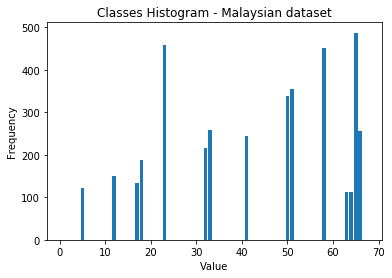

freq->
 [121 151 134 188 458 217 258 244 337 354 452 112 112 487 255]
Mean: 258.67
 Var: 16035.96
 Max: 487.00
 Min: 112.00
 Sum: 3880.00
 STD: 126.63
 CV: 0.49

Total number of objects: 3880


In [425]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'results3/gt_phase_2.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print ('freq->\n',counts)
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print ('Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean()) )
print ('Total number of objects:',len(tmp))

In [426]:
!cat gt_blur_filter.txt > ./results3/gt_phase_2_after_aug.txt
!cat ./results3/gt_phase_2.txt >> ./results3/gt_phase_2_after_aug.txt

!cat ./results3/gt_phase_1_after_aug.txt > ./results3/gt_phase_1_2_after_aug.txt
!cat ./results3/gt_phase_2.txt >> ./results3/gt_phase_1_2_after_aug.txt

## Check histogram for phase 2 images merged with original images

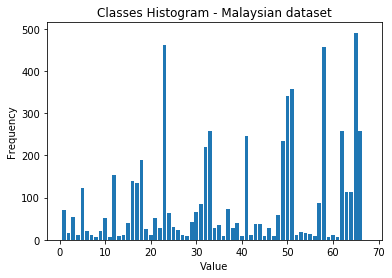

freq->
 [ 70  17  54  11 122  20  11   6  20  51   6 153   9  12  39 140 135 190
  25  12  52  27 462  63  30  24  12   8  42  66  85 219 259  27  34   9
  72  28  41   8 246  11  37  37   9  27   8  59 234 340 357  11  18  15
  13   8  87 456   6  11   6 257 113 113 491 257]
Mean: 89.36
 Var: 14256.60
 Max: 491.00
 Min: 6.00
 Sum: 5898.00
 STD: 119.40
 CV: 1.34

Total number of objects: 5898


In [427]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'results3/gt_phase_2_after_aug.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print ('freq->\n',counts)
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print ('Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean()))
print ('Total number of objects:',len(tmp))

## Check histogram for phase 2 images merged with phase 1 and the original Image

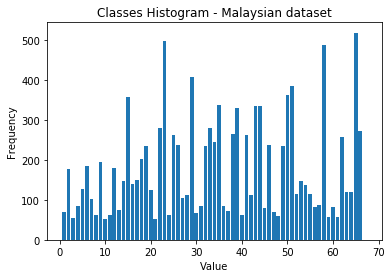

freq->
 [ 70 178  54  85 127 186 103  61 194  51  61 179  75 147 359 140 149 203
 234 126  52 281 499  63 263 238 106 113 407  66  85 235 280 245 338  84
  72 264 330  63 263 113 336 336  79 238  70  59 234 362 385 115 147 137
 115  83  87 489  56  82  57 257 121 121 519 273]
Mean: 181.82
 Var: 14634.21
 Max: 519.00
 Min: 51.00
 Sum: 12000.00
 STD: 120.97
 CV: 0.67

Total number of objects: 12000


In [428]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'results3/gt_phase_1_2_after_aug.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print ('freq->\n',counts)
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print ('Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean()))
print ('Total number of objects:',len(tmp))

# Elimination
1- All images are in All_images withound the mask image

2- all the annotation are in gt_phase_1_2_after_aug.txt

what i have to do:

1- Collect the total frequancy for each object

2- Generate for each image a dictienary to all objects in the image

3- from 1 & 2 check loop for each **class out of 66** image check if freq > 50 

    if True:
        loop for all images
            check if we delete the image no other object freq in the image will not be less 50:
                if yes -> delete the whole image and its annotation from the groundtruth then update the freq array
                if no -> then hide the objects that will not be affected then update the annotation as well as the freq array
                

In [429]:
!ln -s /home/dgxadmin/DL/Datasets/MTSD/Images/*.jpg ./data/All_images3/
!ln -s /home/dgxadmin/DL/Datasets/MTSD/Images/*.JPG ./data/All_images3/
!ln -s /home/dgxadmin/DL/mtsd_augmentation/data/test3/aug/output/aug_* ./data/All_images3/
!ln -s /home/dgxadmin/DL/mtsd_augmentation/data/test3/aug2/output/aug2_* ./data/All_images3/

In [430]:
def anno_parse(line):
    spl = line.split(';')
    name = spl[0]
    x1 = spl[1]
    y1 = spl[2]
    x2 = spl[3]
    y2 = spl[4]
    cls = spl[5].strip()
    name = name.replace('./output/','')
    return name, int(x1), int(y1), int(x2), int(y2), int(cls)

In [431]:
import numpy as np
import os
import cv2
import time
#import progressbar

images_path = 'data/All_images3'
gt_path = 'results3/gt_phase_1_2_after_aug.txt'

f = open(gt_path, 'rt')

# 1- Collect the total frequancy for each object
tmp = []
for line in f:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
    
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print (frq, len(frq))

# 2- Generate for each image a dictienary to all objects in the image
my_dict = {}
f.seek(0)
lines = f.readlines()
#with progressbar.ProgressBar(maxval=len(lines)) as bar:
for i, line in enumerate(lines):
    name, x1,y1,x2,y2,cls = anno_parse(line)
    if not my_dict.has_key(name):
        my_dict.update({name:[]})

    my_obj = (x1,y1, x2, y2, cls)
    my_dict[name].append(my_obj)

        #bar.update(i)
print ('Done...')

# eliminate the objects with bbox aspect different very high or small
# and in corner
#for img in my_dict:
    #print img[-20::], my_dict[img]
#    for obj in my_dict[img]:
#        x1,y1,x2,y2,_ = obj
#        if x1 == 0:
#            print img
    

f.close()

[ 70 178  54  85 127 186 103  61 194  51  61 179  75 147 359 140 149 203
 234 126  52 281 499  63 263 238 106 113 407  66  85 235 280 245 338  84
  72 264 330  63 263 113 336 336  79 238  70  59 234 362 385 115 147 137
 115  83  87 489  56  82  57 257 121 121 519 273] 66
Done...


In [432]:
from PIL import Image

i = 0
for img in my_dict:
    for obj in my_dict[img]:
        im = Image.open(os.path.join(images_path,img))
        w,h = im.size
        x1,y1,x2,y2,cls = obj
        if x1 == 0 or x2 == w or y1 == 0 or y2 == h:
            i+=1
            print (img, classes[cls], x1,y1,x2,y2)
            
print (i)

aug2_original_P1860113_aug.jpg_3d73d073-fabe-4160-9334-d8546c70e787.jpg speed-limit-20 1775 0 2181 299
aug2_original_P1860113_aug.jpg_cd9f49b5-ba20-46bf-ba0d-70a7a60f75bc.jpg speed-limit-20 1955 0 2358 346
aug_original_P1840458_aug.jpg_0a58bf12-c15d-46d9-b952-6500ac1e99e1.jpg stop 4330 181 4592 613
aug2_original_P1840560_aug.jpg_de1f3af0-9294-4b6e-acd5-f73acec548a1.jpg wide-limit-3.-m 0 613 529 1045
aug2_original_P1860113_aug.jpg_a882220b-ad98-46b9-959b-276736ec5c26.jpg speed-limit-20 1033 0 1495 423
aug_original_P1830988_aug.jpg_2a83538d-78ee-4fac-ad06-9767d54ff955.jpg crossroads-to-the-left 0 759 405 1528
aug_original_P1860068_aug.jpg_dfbf984c-4cfa-44b0-9268-2a45ea9af0b8.jpg speed-limit-60 0 1223 253 1497
aug_original_P1840096_aug.jpg_773eab70-86bb-4132-a052-abaa3c96020f.jpg height-limit-sign-4.-m 3280 0 3787 319
aug_original_P1840004_aug.jpg_d9eeff87-e412-47c1-89d7-12f493366374.jpg pedestrain-crossing-opt2 0 211 453 634
aug2_original_P1840560_aug.jpg_537b74dc-f1f5-493c-81c3-023ebd5e

aug2_original_P1840485_aug.jpg_05303055-3d1a-41d2-bf0b-dd0b8f21a88e.jpg minor-road-on-left-opt2 0 1710 504 2129
aug_original_P1830986_aug.jpg_cee8d6db-7644-44bc-bacc-94e0432e5602.jpg roundabout-ahead 0 793 239 1167
aug_original_P1840016_aug.jpg_b4e50d21-eb5c-4e2d-bbe6-8e38440f203f.jpg towing-zone 0 725 561 1148
aug_original_P1830995_aug.jpg_9c13765a-17fb-46c1-8d35-06028daa2b13.jpg school-childern-crossing-opt1 0 699 496 1473
aug_original_P1840222_aug.jpg_0fbe3c16-7e72-4ec3-979e-f4eeb0ecfb60.jpg crossroads-to-the-left 0 1813 277 2119
aug_original_P1840214_aug.jpg_696c8028-e398-4365-8314-c1ccc50c90e3.jpg towing-zone 0 706 407 1245
aug_original_P1840138_aug.jpg_5f713faa-e756-4fad-85cd-e638989f610c.jpg no-entry-for-vehicles-ex-5T-truntks-etc 0 875 185 1187
aug2_original_P1840485_aug.jpg_3706ae5c-aeda-4403-b03b-a3c2db9aa547.jpg minor-road-on-left-opt2 0 1607 327 2061
aug_original_P1840003_aug.jpg_f7803d0b-8d0b-42e0-8e22-8cdcd1f63c4e.jpg pedestrain-crossing-opt2 0 444 419 809
aug2_original_P

P1840246.JPG obstacles 4252 1175 4592 1666
P1840246.JPG split-way 4267 1717 4592 2212
aug_original_P1840009_aug.jpg_80b643b1-4407-46e6-ae17-86409ed6c0b7.jpg pedestrain-crossing-opt2 4407 460 4592 831
aug_original_P1840458_aug.jpg_02ae6b6c-97b9-4d43-b896-dfafd839d36d.jpg stop 4227 408 4592 781
aug_original_P1840537_aug.jpg_ff96c1b6-8f75-4283-ad02-654a3eba225e.jpg speed-limit-90 4415 1466 4592 1675
aug2_original_P1860056_aug.jpg_f4c04fb2-1f34-4cde-9c66-b628c9e44748.jpg weight-limit-sign-30T 4315 1889 4592 2447
aug_original_P1860052_aug.jpg_08f6b679-fb0e-4d8d-a886-25845f615b5a.jpg towing-zone 0 859 483 1357
aug2_original_P1860056_aug.jpg_c4836dff-ac4a-4907-929b-c616741eb6c7.jpg weight-limit-sign-30T 4263 1162 4592 1689
aug2_original_P1860056_aug.jpg_6998c1ac-c0c0-4a8f-bbaf-805b8bc8cf97.jpg weight-limit-sign-30T 4241 1439 4592 1879
aug_original_P1830988_aug.jpg_59abf3e6-3851-456a-a1de-08f6168f275c.jpg crossroads-to-the-left 0 807 376 1407
aug2_original_P1840560_aug.jpg_4e11480b-51d5-46e0-a

3- from 1 & 2 check loop for each class out of 66 image check if freq > 50

if True:

    loop for all images
    
        check if we delete the image no other object freq in the image will not be less 50:
        
            if yes -> delete the whole image and its annotation from the groundtruth then update the freq array
            
            if no -> then hide the objects that will not be affected then update the annotation as well as the freq array


In [140]:
images_path = 'data/All_images3'
del_image_path = 'del_image3.txt'
del_object_path = 'del_object3.txt'

del_image = open(del_image_path, 'wt')
del_object = open(del_object_path, 'wt')

imgs_del = [] # loop to delete all img from my_dict

for img in my_dict:
    im_del = True
    objs_del = []
    objs_not_del = []
    # check delete the image or not
    for i, obj in enumerate(my_dict[img]):
        _,_,_,_,cls = obj
        if frq[cls] <= 50:
            im_del = False
            objs_not_del.append(obj)
        else:
            frq[cls] -= 1 # correct here because we may have two objects from the same class and in case of im_del all
                            # of the object freq will be subtracted by 1 
            objs_del.append(obj)
            
    if im_del == True:
        #print img
        del_image.write(img+' '+str(objs_del)+'\n\r')
        os.remove(os.path.join(images_path, img))
        #del my_dict[img] #####->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>. del will affect the loop
        imgs_del.append(img) # TO NOT EFFECT THE LOOP I WILL DELETE THEM FROM my_dict AFTER THE LOOP
    else:
        #if len(objs_del) == 0: # comment this if i want to remove all the link files and copy the image
        #    continue           # -------------------- it will take time ------------------------------
        tmp = cv2.imread(os.path.join(images_path,img))
        org = tmp.copy()
        os.remove(os.path.join(images_path, img))
        
        for obj in objs_del:
            x1,y1,x2,y2,cls = obj
            #if frq[cls] > 50:
                #frq[cls] -= 1 # wrong because we may have two objects from the same class
            #del my_dict[img][i] # wrong because it will change the index after delete
            del_object.write(img+' '+str(obj)+' '+classes[cls] + '\n\r')

            ### bluer the object x1,y1,x2,y2
            np.random.shuffle(tmp[y1:y2+1,x1:x2+1,0])
            np.random.shuffle(tmp[y1:y2+1,x1:x2+1,0].T)

            np.random.shuffle(tmp[y1:y2+1,x1:x2+1,1])
            np.random.shuffle(tmp[y1:y2+1,x1:x2+1,1].T)

            np.random.shuffle(tmp[y1:y2+1,x1:x2+1,2])
            np.random.shuffle(tmp[y1:y2+1,x1:x2+1,2].T)

            #np.random.shuffle(im[y1:y2,x1:x2])
            #np.random.shuffle(im[y1:y2,x1:x2].T)

            blur = cv2.blur(tmp, (50, 50))

            #print lines[0] , x1, x2, y1, y2

            #print im[y1:y2,x1:x2,0]
            #cv2.imwrite('aug.jpg', im)

            num =10
            tmp[y1-num:y2+num,x1-num:x2+num] = blur[y1-num:y2+num,x1-num:x2+num]
            ###
            
        for obj in objs_not_del:
            x1,y1,x2,y2,cls = obj
            ynum = int(y2-y1)/14
            xnum = int(x2-x1)/14
            tmp[y1-ynum:y2+ynum,x1-xnum:x2+xnum] = org[y1-ynum:y2+ynum,x1-xnum:x2+xnum]
        
        my_dict[img] = objs_not_del # to keep only the objects that is not deleted
                                
        cv2.imwrite(os.path.join(images_path,img), tmp)
                
for img in imgs_del:
    del my_dict[img]
    
del_image.close()
del_object.close()
print ('done ....')

done ....


Generate the new annotation from the my_dict final

In [433]:
len(my_dict)

9076

don't forget to check P1840369.jpg images anno

ln -s ../MTSD/Images/*.jpg ./

ln -s ../MTSD/Images/*.JPG ./

ln -s ../test/aug/output/aug_*.jpg ./

ln -s ../test/aug2/output/aug2_*.jpg ./

Before the run

All_images have 9350 images link 13.8GB

with 159 link not used in the folder

After run 2545 image 5.0GB without the 159 link 


In [434]:
final_anno_path = 'results3/gt_final.txt'
final_anno = open(final_anno_path, 'wt')

for img in my_dict:
    for obj in my_dict[img]:
        x1,y1,x2,y2,cls = obj
        final_anno.write('{};{};{};{};{};{}\n'.format(img,x1,y1,x2,y2,cls))

final_anno.close()

In [435]:
print (frq, len(frq), np.sum(frq))

[ 70 178  54  85 127 186 103  61 194  51  61 179  75 147 359 140 149 203
 234 126  52 281 499  63 263 238 106 113 407  66  85 235 280 245 338  84
  72 264 330  63 263 113 336 336  79 238  70  59 234 362 385 115 147 137
 115  83  87 489  56  82  57 257 121 121 519 273] 66 12000


In [436]:
final_anno_path = 'results3/gt_final.txt'
final_anno = open(final_anno_path, 'rt')

# 1- Collect the total frequancy for each object
final_tmp = []
for line in final_anno:
    final_tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
    
final_a = np.array(final_tmp)
final_unique, final_counts = np.unique(final_a, return_counts=True)

final_frq = np.array(final_counts)
print (final_frq, len(final_frq), np.sum(final_frq))

final_anno.close()
print ('Done...')

[ 70 178  54  85 127 186 103  61 194  51  61 179  75 147 359 140 149 203
 234 126  52 281 499  63 263 238 106 113 407  66  85 235 280 245 338  84
  72 264 330  63 263 113 336 336  79 238  70  59 234 362 385 115 147 137
 115  83  87 489  56  82  57 257 121 121 519 273] 66 12000
Done...


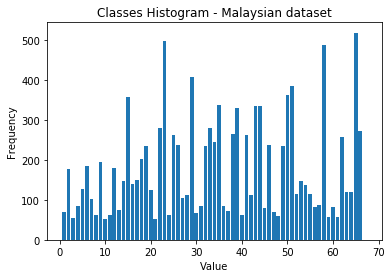

freq->
 [ 70 178  54  85 127 186 103  61 194  51  61 179  75 147 359 140 149 203
 234 126  52 281 499  63 263 238 106 113 407  66  85 235 280 245 338  84
  72 264 330  63 263 113 336 336  79 238  70  59 234 362 385 115 147 137
 115  83  87 489  56  82  57 257 121 121 519 273]
Mean: 181.82
 Var: 14634.21
 Max: 519.00
 Min: 51.00
 Sum: 12000.00
 STD: 120.97
 CV: 0.67

Total number of objects: 12000


In [437]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'results3/gt_final.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print ('freq->\n',counts)
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print ('Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean()))
print ('Total number of objects:',len(tmp))

# End of Elimination

# For Testing

In [111]:
#x = cv2.imread('/home/mjiit/Hossam/mtsd_augmentation/data/testing/short/1_aug.jpg')

#os.remove('/home/mjiit/Hossam/mtsd_augmentation/data/testing/short/1_aug.jpg')

#cv2.imwrite('/home/mjiit/Hossam/mtsd_augmentation/data/testing/short/1_aug.jpg', x)

dicte = {'1':[(5,6), (7,8)], '7':[(9,9)], '9':[(0,0)]}
print dicte

del_dicte = []

for did in dicte:
    if did == '7':
        del_dicte.append(did)

for kk in del_dicte:
    del dicte[kk]
print dicte

test = [(1,2), (3,4), (5,7)]

print '__', dicte
dicte['9'] = test
test = [(1,3),(9,0)]
print '---', dicte

{'1': [(5, 6), (7, 8)], '9': [(0, 0)], '7': [(9, 9)]}
{'1': [(5, 6), (7, 8)], '9': [(0, 0)]}
__ {'1': [(5, 6), (7, 8)], '9': [(0, 0)]}
--- {'1': [(5, 6), (7, 8)], '9': [(1, 2), (3, 4), (5, 7)]}


In [438]:
len(my_dict)

9076

In [58]:
my_dict.items()[2]

('aug2_original_P1840287_aug.jpg_3e368841-d808-4b58-afc5-37ff6baac7d9.jpg',
 [(2756, 1112, 2965, 1309, 64)])

In [59]:
print my_dict.items()[3]

('aug2_original_P1840387_aug.jpg_e0744d93-8e90-4234-8e61-4f5d6c9b1cbf.jpg', [(1055, 1248, 1412, 1569, 22)])


In [385]:
print classes[16]

height-limit-sign-6.-m


In [148]:
# mask with different colors space per each object sequential

#./data/test/gt/P1840014.JPG
#./data/test/gt/P1840114.JPG
# P1860079.JPG

#ff = '130.jpg'
ff = 'P1840185.JPG'
im = cv2.imread(os.path.join(mask_path,ff))
f = open(os.path.join(label_path, ff.split('.')[0]+'.txt'), 'r')
#im[im == 255] = 1
#im[im == 0] = 255
#im[im == 1] = 0
lines = f.readlines()
print 'Number of objects', len(lines)
for i in range(0, len(lines)):
    lower = np.array(color_list[i])-10
    upper = np.array(color_list[i])+10
    mask = cv2.inRange(im, lower, upper)
    im3 = cv2.bitwise_and(im, im, mask=mask)


    print 'obj#', i
    im2 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

    print np.max(im2), np.min(im2)

    cv2.imwrite('test'+str(i)+'.jpg', im2)
    ret, thresh = cv2.threshold(im2, 0, np.max(im2)+1 ,cv2.THRESH_BINARY)
    _, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print len(contours)
    #for i in range(0, len(contours)):
        #if(i%2 == 0)
    
    # getting the maximum width contours
    x,y,w,h = cv2.boundingRect(contours[0])
    for cnt in contours:
        cx, cy, cw, ch = cv2.boundingRect(cnt)
        if cw > w:
            x,y,w,h = cx, cy, cw, ch
    #cnt = contours[i]
    
    cv2.rectangle(im, (x,y), (x+w, y+h), (0,240,180), 5)
    print (x,y), (x+w, y+h)
    cv2.imwrite(str(i)+'.jpg', im)
    
    print '_______'

Number of objects 7
obj# 0
32 0
1
(240, 1832) (786, 2371)
_______
obj# 1
179 0
4
(255, 1207) (791, 1744)
_______
obj# 2
106 0
9
(640, 89) (814, 260)
_______
obj# 3
255 0
5
(1776, 1737) (1851, 1812)
_______
obj# 4
79 0
16
(2840, 1731) (2877, 1768)
_______
obj# 5
150 0
6
(1831, 1743) (1896, 1829)
_______
obj# 6
17 0
13
(1811, 1609) (1896, 1689)
_______


In [40]:
im = cv2.imread('./data/test/images/P1840121.JPG')
f = open('./data/labels/P1840121.txt')
lines = f.readlines()

im_out = np.zeros(im.shape, np.uint8)

for line in lines:
    spl = line.split(' ')
    x1 = int(spl[1])+1
    y1 = int(spl[2])+1
    x2 = int(spl[3])-1
    y2 = int(spl[4])-1
    
    cv2.rectangle(im_out, (x1,y1), (x2,y2),(255,255,255), -1)
    
cv2.imwrite('test.jpg', im_out)   

True

In [123]:
im = cv2.imread('./data/test/gt/P1840217.JPG')
im2 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(im2, 8, 8 ,8)
_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for i in range(0, len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    cv2.rectangle(im, (x,y), (x+w, y+h), (0,255,0), 2)
    print (x,y), (x+w, y+h)
    cv2.imwrite(str(i)+'.jpg', im)

(2644, 1198) (2805, 1366)
(2800, 1360) (2804, 1365)
(2654, 1360) (2801, 1365)
(2650, 1360) (2654, 1364)
(2645, 1360) (2649, 1365)
(2650, 1199) (2653, 1361)
(2646, 1199) (2649, 1361)


946 / 977


Button(description=u'Next', style=ButtonStyle())

Button(description=u'Back', style=ButtonStyle())

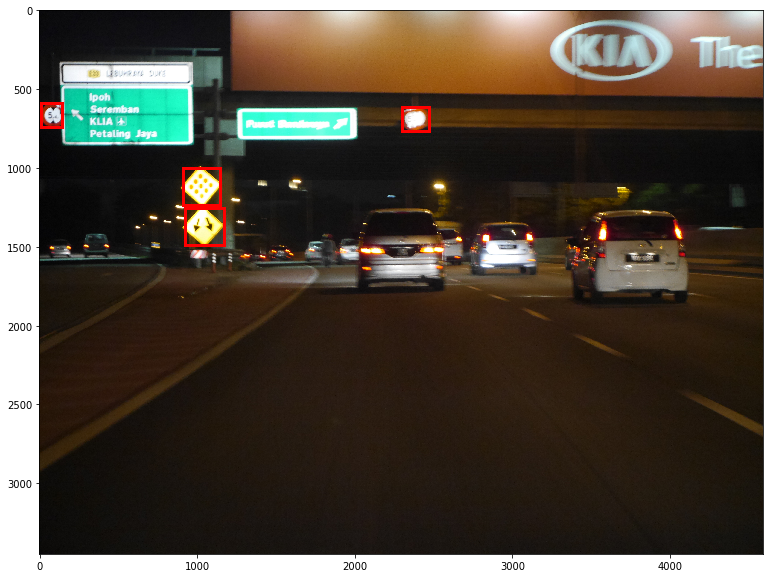

In [286]:
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
import matplotlib.image as mpimg

%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual#, Button
import ipywidgets as widgets
from IPython import display

import matplotlib.patches as patches


i=0
button_next = widgets.Button(description="Next")
button_back = widgets.Button(description="Back")

im_path = './data/MTSD/Images/'
gt_in_p = './data/MTSD/Annotations/gt.txt'
gt_in_f = open(gt_in_p, 'r')

lines = gt_in_f.readlines()
dic = {}

for line in lines:
    spl = line.split(';')
    if dic.has_key(spl[0]):
        dic[spl[0]].append(line)
    else:
        dic[spl[0]] = [line]

print(i+1,'/',len(dic))
display.display(button_next,button_back)
#display.display(button_no)
fig,ax = plt.subplots(1, figsize = (20,10))
#plt.figure(figsize=(200,100))
ax.imshow( Image.open( os.path.join(im_path,dic.items()[i][0]) ) )
for k in dic.items()[i][1]:
    sp = k.split(';')
    rect = patches.Rectangle((int(sp[1]),int(sp[2])),int(sp[3])-int(sp[1]),int(sp[4])-int(sp[2]),linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

plt.show()

def on_click_next(b):
    #print("yes")
    global i
    
    i=i+1
    found = False
    while (not found) and (i<len(dic)):
        for k in dic.items()[i][1]:
            if k.split(';')[5] == '62\n':
                found = True

        i = i+1
    i=i-1
    display.clear_output()
    print(dic.items()[i])
    if i>= len(dic):
        print("Finish")
        return
    
    print(i,'/',len(dic))
    display.display(button_next)
    display.display(button_back)
    fig,ax = plt.subplots(1, figsize = (20,10))
    ax.imshow( Image.open( os.path.join(im_path,dic.items()[i][0]) ) )
    im = cv2.imread(os.path.join(im_path, dic.items()[i][0]))
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    for k in dic.items()[i][1]:
        sp = k.split(';')
        x1 = int(sp[1])
        y1 = int(sp[2])
        x2 = int(sp[3])
        y2 = int(sp[4])
        rect = patches.Rectangle((int(sp[1]),int(sp[2])),int(sp[3])-int(sp[1]),int(sp[4])-int(sp[2]),linewidth=3,edgecolor='r',facecolor='none')
        fm = variance_of_laplacian(gray[y1:y2+1,x1:x2+1])
        print('blur factor = ',fm, (fm/float((y2-y1)*(x2-x1))))
        ax.add_patch(rect)
    plt.show()
    
def on_click_back(b):
    global i
    
    if i==0:
        return
              
    i=i-1
    
    display.clear_output()
    
    
    print(i+1,'/',len(dic))
    display.display(button_next)
    display.display(button_back)
    fig,ax = plt.subplots(1, figsize = (20,10))
    ax.imshow( Image.open( os.path.join(im_path,dic.items()[i][0]) ) )
    for k in dic.items()[i][1]:
        sp = k.split(';')
        rect = patches.Rectangle((int(sp[1]),int(sp[2])),int(sp[3])-int(sp[1]),int(sp[4])-int(sp[2]),linewidth=3,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
    plt.show()

    
button_next.on_click(on_click_next)
button_back.on_click(on_click_back)

128 / 977


Button(description=u'Next', style=ButtonStyle())

Button(description=u'Back', style=ButtonStyle())

P1860101.JPG
w= 319 h= 316
w= 171 h= 169
w= 111 h= 109
w= 53 h= 79
w= 33 h= 31
w= 48 h= 49


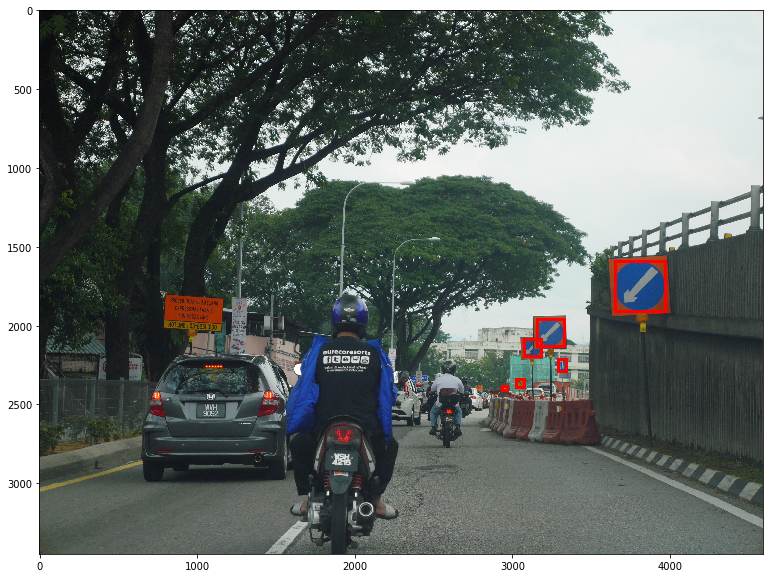

In [296]:
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
import matplotlib.image as mpimg

%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual#, Button
import ipywidgets as widgets
from IPython import display

import matplotlib.patches as patches


i=0
button_next = widgets.Button(description="Next")
button_back = widgets.Button(description="Back")

im_path = './data/MTSD/Images/'
gt_in_p = './data/MTSD/Annotations/gt.txt'
gt_in_f = open(gt_in_p, 'r')

lines = gt_in_f.readlines()
dic = {}

for line in lines:
    spl = line.split(';')
    if dic.has_key(spl[0]):
        dic[spl[0]].append(line)
    else:
        dic[spl[0]] = [line]

print(i+1,'/',len(dic))
display.display(button_next,button_back)
#display.display(button_no)
fig,ax = plt.subplots(1, figsize = (20,10))
#plt.figure(figsize=(200,100))
myimg = Image.open( os.path.join(im_path,dic.items()[i][0]))
ax.imshow( myimg )
myflag = False
for k in dic.items()[i][1]:
    sp = k.split(';')
    rect = patches.Rectangle((int(sp[1]),int(sp[2])),int(sp[3])-int(sp[1]),int(sp[4])-int(sp[2]),linewidth=3,edgecolor='r',facecolor='none')
    print('w=', int(sp[3])-int(sp[1]), 'h=',int(sp[4])-int(sp[2]))
    ax.add_patch(rect)

plt.show()

def on_click_next(b):
    #print("yes")
    global i
    
    i=i+1
    found = False
    while (not found) and (i<len(dic)):
        for k in dic.items()[i][1]:
            if k.split(';')[5] == '62\n':
                found = True

        i = i+1
    i=i-1
    display.clear_output()
    print(dic.items()[i])
    if i>= len(dic):
        print("Finish")
        return
    
    print(i,'/',len(dic))
    display.display(button_next)
    display.display(button_back)
    fig,ax = plt.subplots(1, figsize = (20,10))
    ax.imshow( Image.open( os.path.join(im_path,dic.items()[i][0]) ) )
    im = cv2.imread(os.path.join(im_path, dic.items()[i][0]))
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    for k in dic.items()[i][1]:
        sp = k.split(';')
        x1 = int(sp[1])
        y1 = int(sp[2])
        x2 = int(sp[3])
        y2 = int(sp[4])
        rect = patches.Rectangle((int(sp[1]),int(sp[2])),int(sp[3])-int(sp[1]),int(sp[4])-int(sp[2]),linewidth=3,edgecolor='r',facecolor='none')
        fm = variance_of_laplacian(gray[y1:y2+1,x1:x2+1])
        print('blur factor = ',fm, (fm/float((y2-y1)*(x2-x1))))
        print('w=', int(sp[3])-int(sp[1]), 'h=',int(sp[4])-int(sp[2]))
        ax.add_patch(rect)
    plt.show()
    
def on_click_back(b):
    global i
    
    if i==0:
        return
              
    i=i-1
    
    display.clear_output()
    
    
    print(i+1,'/',len(dic))
    display.display(button_next)
    display.display(button_back)
    fig,ax = plt.subplots(1, figsize = (20,10))
    ax.imshow( Image.open( os.path.join(im_path,dic.items()[i][0]) ) )
    print(dic.items()[i][1][0].split(';')[0])
    for k in dic.items()[i][1]:
        sp = k.split(';')
        rect = patches.Rectangle((int(sp[1]),int(sp[2])),int(sp[3])-int(sp[1]),int(sp[4])-int(sp[2]),linewidth=3,edgecolor='r',facecolor='none')
        print('w=', int(sp[3])-int(sp[1]), 'h=',int(sp[4])-int(sp[2]))
        
        ax.add_patch(rect)
    plt.show()

    
button_next.on_click(on_click_next)
button_back.on_click(on_click_back)